<a href="https://colab.research.google.com/github/timothy2077/1st-Rep/blob/master/MainQuest02_Pokemon_Post_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [14]:
from google.colab import drive
drive.mount('/content/drive')

# 이후에는 파일 경로를 사용하여 파일을 불러올 수 있습니다.
# 예를 들어, 파일이 'My Drive'에 있다면 다음과 같이 파일을 불러올 수 있습니다:
file_path = "/content/drive/My Drive/Pokemon Data_0615.csv"  # 실제 파일 경로로 변경하세요


Mounted at /content/drive


In [15]:
original_data = pd.read_csv('/content/drive/My Drive/Pokemon Data_0615.csv', encoding='latin1')  # 실제 파일 경로로 변경하세요
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()


(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


위에서 print(pokemon.shape)로 데이터셋의 크기를 출력하였습니다.
데이터셋은 총 800행, 13열로 이루어져 있군요.
포켓몬이 총 800마리이고, 각 포켓몬을 설명하는 특성(feature)은 13개라고 해석할 수 있겠습니다.

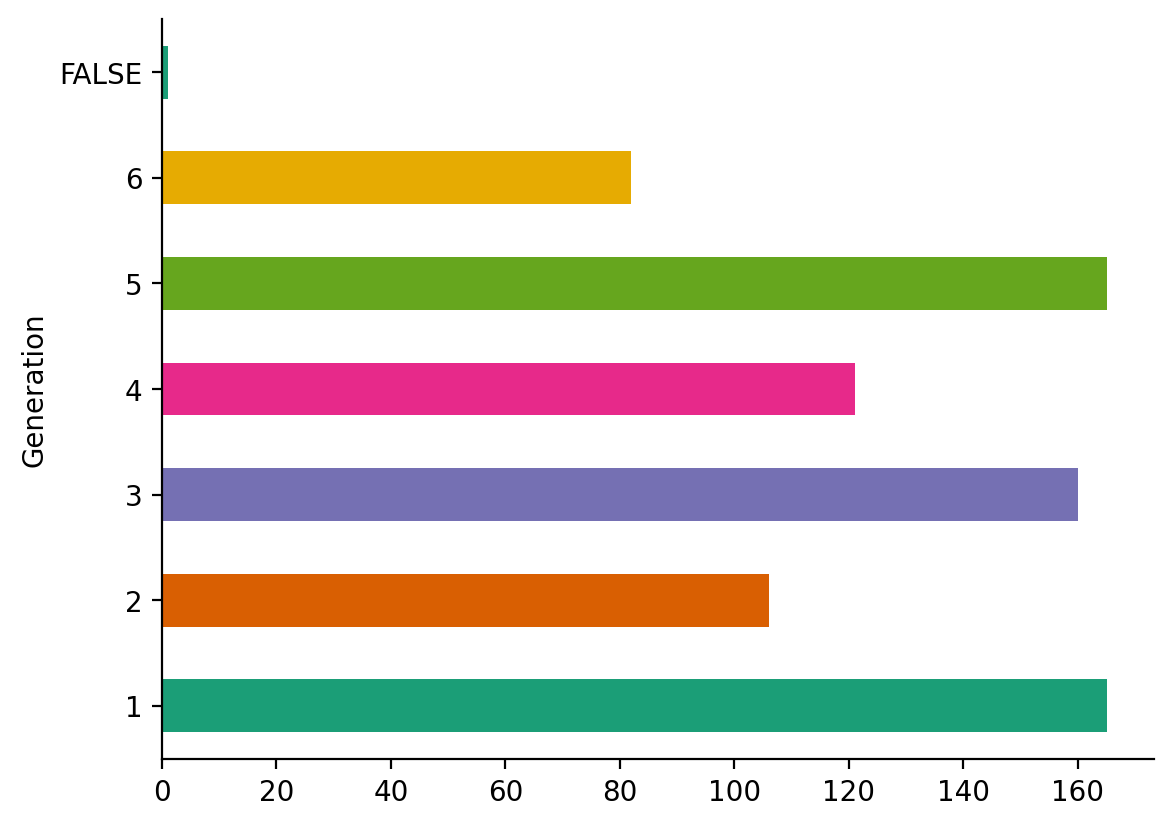

In [ ]:
# @title Generation

from matplotlib import pyplot as plt
import seaborn as sns
pokemon.groupby('Generation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

이 중 우리가 타겟으로 두고 확인할 데이터는 Legendary (전설의 포켓몬인지 아닌지의 여부)이므로, Legendary == True 값을 가지는 레전드 포켓몬 데이터셋은 legendary 변수에, Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장해두겠습니다.

In [16]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [17]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [18]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True) # Filter using the 'Legendary' column
print(ordinary.shape)
ordinary.head()

(734, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


800개 중 65개의 데이터만 전설의 포켓몬이군요! 역시나 희귀합니다!


## 1-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼

빈 데이터 확인하기

In [19]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          1
Type 2        385
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       1
dtype: int64

흠, 왜 이런 빈 데이터가 존재하는 걸까요?
Type 2 컬럼에만 총 386개의 결측치가 있군요. Type 1이 있고 Type2도 있으므로, 뭔가 두 번째 속성이 없는 포켓몬이 있는 것 같습니다.

데이터셋을 다룰 때 빈 데이터를 다루는 것은 매우 조심스러운 일입니다. 데이터셋의 성격에 따라 빈 데이터를 어떻게 다루어야 할지에 대한 방법이 달라지기 때문이죠.

전체 컬럼 이해하기

In [20]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

각 컬럼이 나타내는 바와 데이터 타입은 다음과 같습니다.


1.포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다.
int
2. Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
3.Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
4.Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
5. Total : 전체 6가지 스탯의 총합. int
6. HP : 포켓몬의 체력. int
7. Attack : 물리 공격력. (scratch, punch 등) int
8. Defense : 물리 공격에 대한 방어력. int
9. Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
10. Sp. Def : 특수 공격에 대한 방어력. int
11. Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
12. Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
13. Legendary : 전설의 포켓몬 여부. !! Target feature !! bool




## 1-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름

In [21]:
len(set(pokemon["#"]))

721

체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가집니다. 파이썬의 집합(set) 자료형은 중복 데이터를 가질 수 없죠? 따라서 집합의 크기가 800이 아니라 721이므로 # 컬럼의 값은 unique하지 않으며(index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.

In [22]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 버전을 나타내는 것으로 보입니다.

pokemon["Name"]을 집합(set)으로 만들어 준 후 길이(len)를 확인하면 중복이 사라지면서 유일한 이름의 개수를 확인할 수 있습니다.

In [23]:
# 'original_data' 또는 'pokemon' DataFrame을 사용합니다.
unique_pokemon_names = set(original_data['Name'])
# 또는
unique_pokemon_names = set(pokemon['Name'])

# 집합의 길이를 계산하여 유일한 포켓몬 이름의 개수를 확인합니다.
print(len(unique_pokemon_names))


800


이름은 데이터셋 전체 값과 같이 800개군요. 모든 이름은 unique함을 알 수 있습니다.

## 1-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성

Type 1 & Type 2 : 포켓몬의 속성


In [24]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 단 한 가지만 가지는군요.

전체를 살펴봐야 하지만, 몇 개를 더 찍어봐도 포켓몬이 가지는 속성은 기본적으로 하나, 또는 최대 두 개까지 가질 수 있는 것을 알 수 있습니다. 특히, 데이터셋에서 한 개의 속성을 가지는 포켓몬은 Type 1에만 속성이 표시되고 Type 2에는 NaN값이 들어가 있습니다.

그렇다면, 각 속성의 종류는 총 몇 가지인지 알아봅시다.

In [25]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(19, 20)

Type 1에는 총 19가지, Type 2에는 총 20가지의 속성이 들어가 있는데, 여기서 Type 2가 한 가지 더 많은 것은 뭘까요?

각자를 집합으로 만들어 차집합을 확인해 봅시다.

In [26]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{'273'}

둘의 차집합은 바로 273 값이군요.
따라서 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음을 알 수 있습니다.

포켓몬들의 모든 Type을 types 변수에 저장하겠습니다.

In [27]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

19
['Fairy', 'Normal', 'Dragon', 'Poison', 'Steel', 'Bug', nan, 'Rock', 'Ground', 'Dark', 'Ghost', 'Fighting', 'Ice', 'Psychic', 'Flying', 'Electric', 'Fire', 'Grass', 'Water']


그렇다면 Type을 하나만 가지고 있는 포켓몬은 몇 마리일까요?
Type이 단 하나뿐이라면 Type 2는 273 값일 것일 겁니다. Type 2가273인 포켓몬의 수를 구해봅시다.

데이터가 비어있는273값의 개수를 확인하고 싶을 때는 다음과 같이 isna() 함수를 활용하면 됩니다.

In [28]:
pokemon["Type 2"].isna().sum()

385

총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

Type 1 데이터 분포 plot

일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인하겠습니다.
우리의 데이터는 일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 불균형 데이터이기 때문에, 전설의 포켓몬은 따로 시각화해 주는 것이 좋을 것 같군요.

다음과 같이 plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용하겠습니다.
countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.

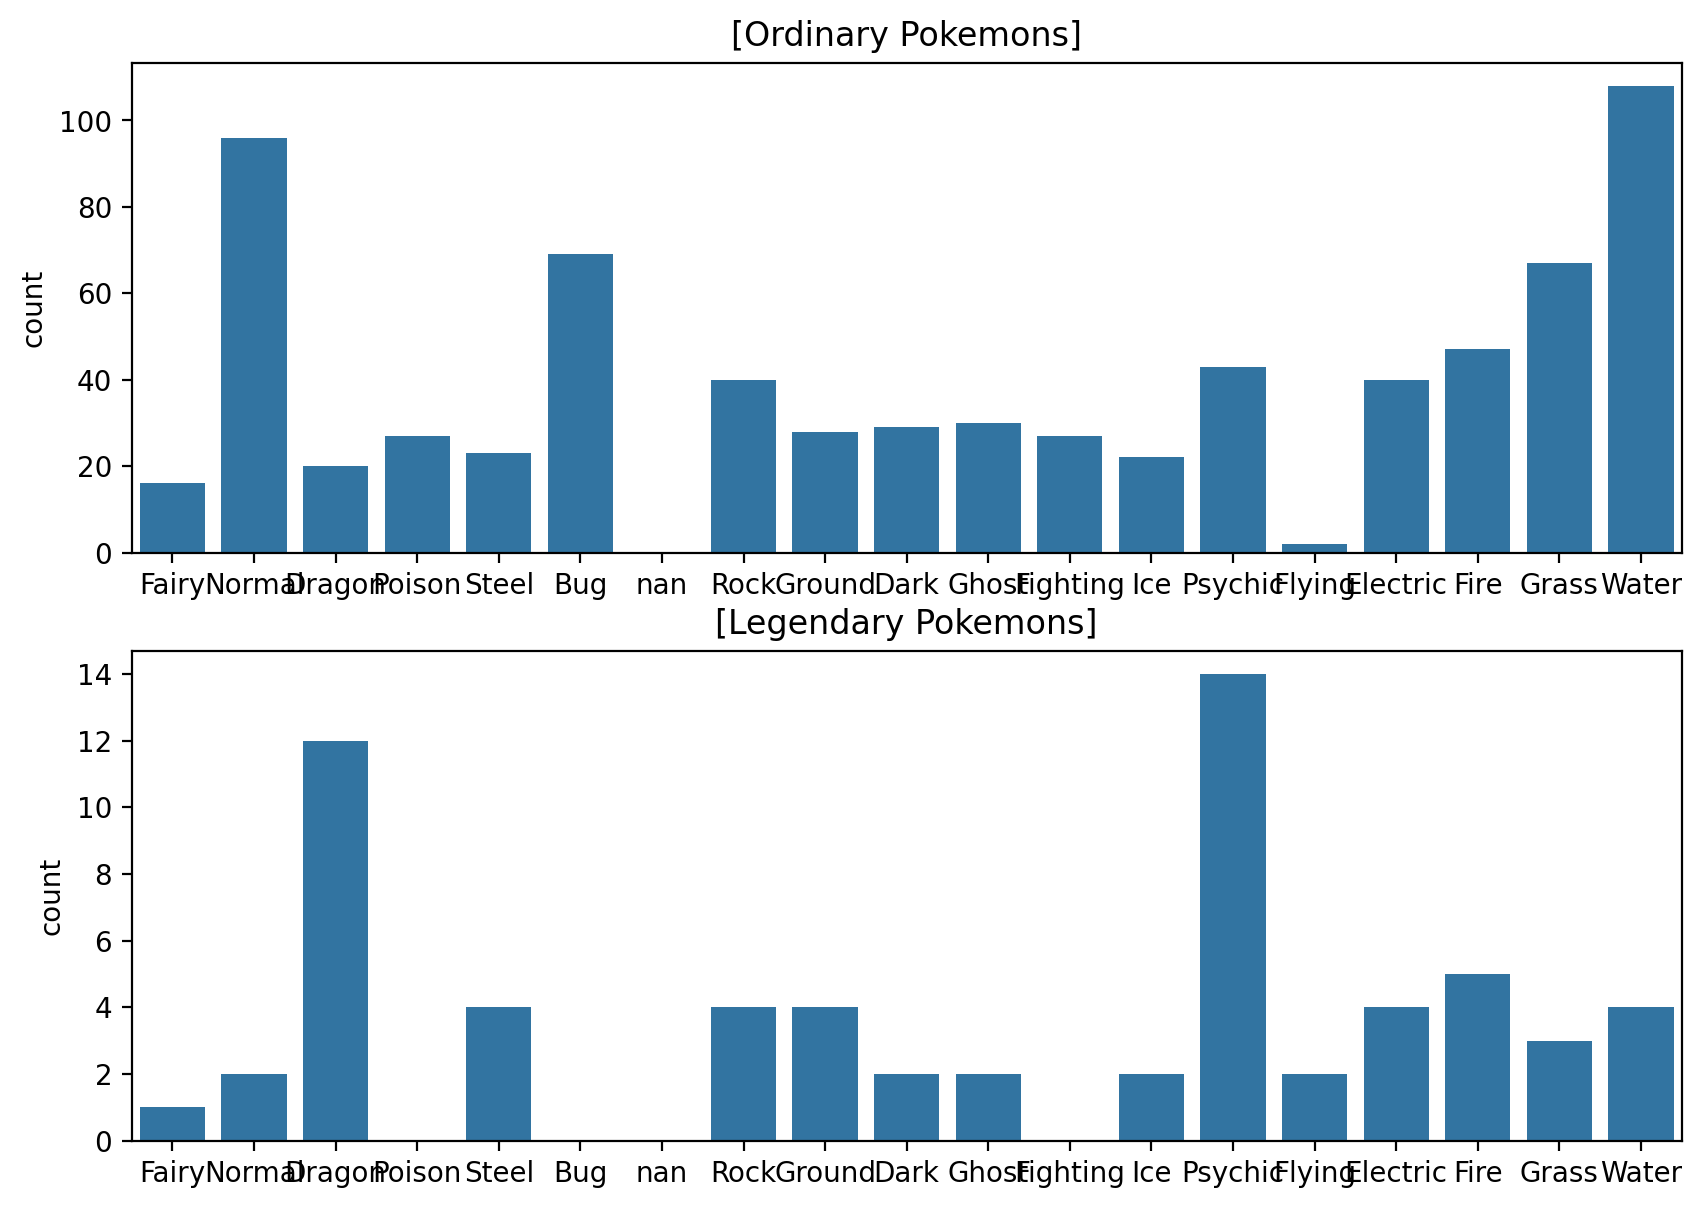

In [29]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반 포켓몬은 물 속성이 가장 많으며, 그 다음으로 노말 속성이 많고 속성 분포가 비교적 균일합니다.
전설의 포켓몬은 에스퍼 속성이 가장 많으며 그 다음으로 드래곤 속성이 많고 속성 분포가 특정 속성에 치우침이 있습니다.
이러한 차이는 게임 내에서 전설의 포켓몬이 특별한 위치를 차지하고 있음을 나타냅니다.
전설의 포켓몬은 일반적으로 더 드물고 강력한 능력을 가지고 있어 그들의 속성 분포가 더 특정 속성에 집중되어 있는 경향이 있습니다.

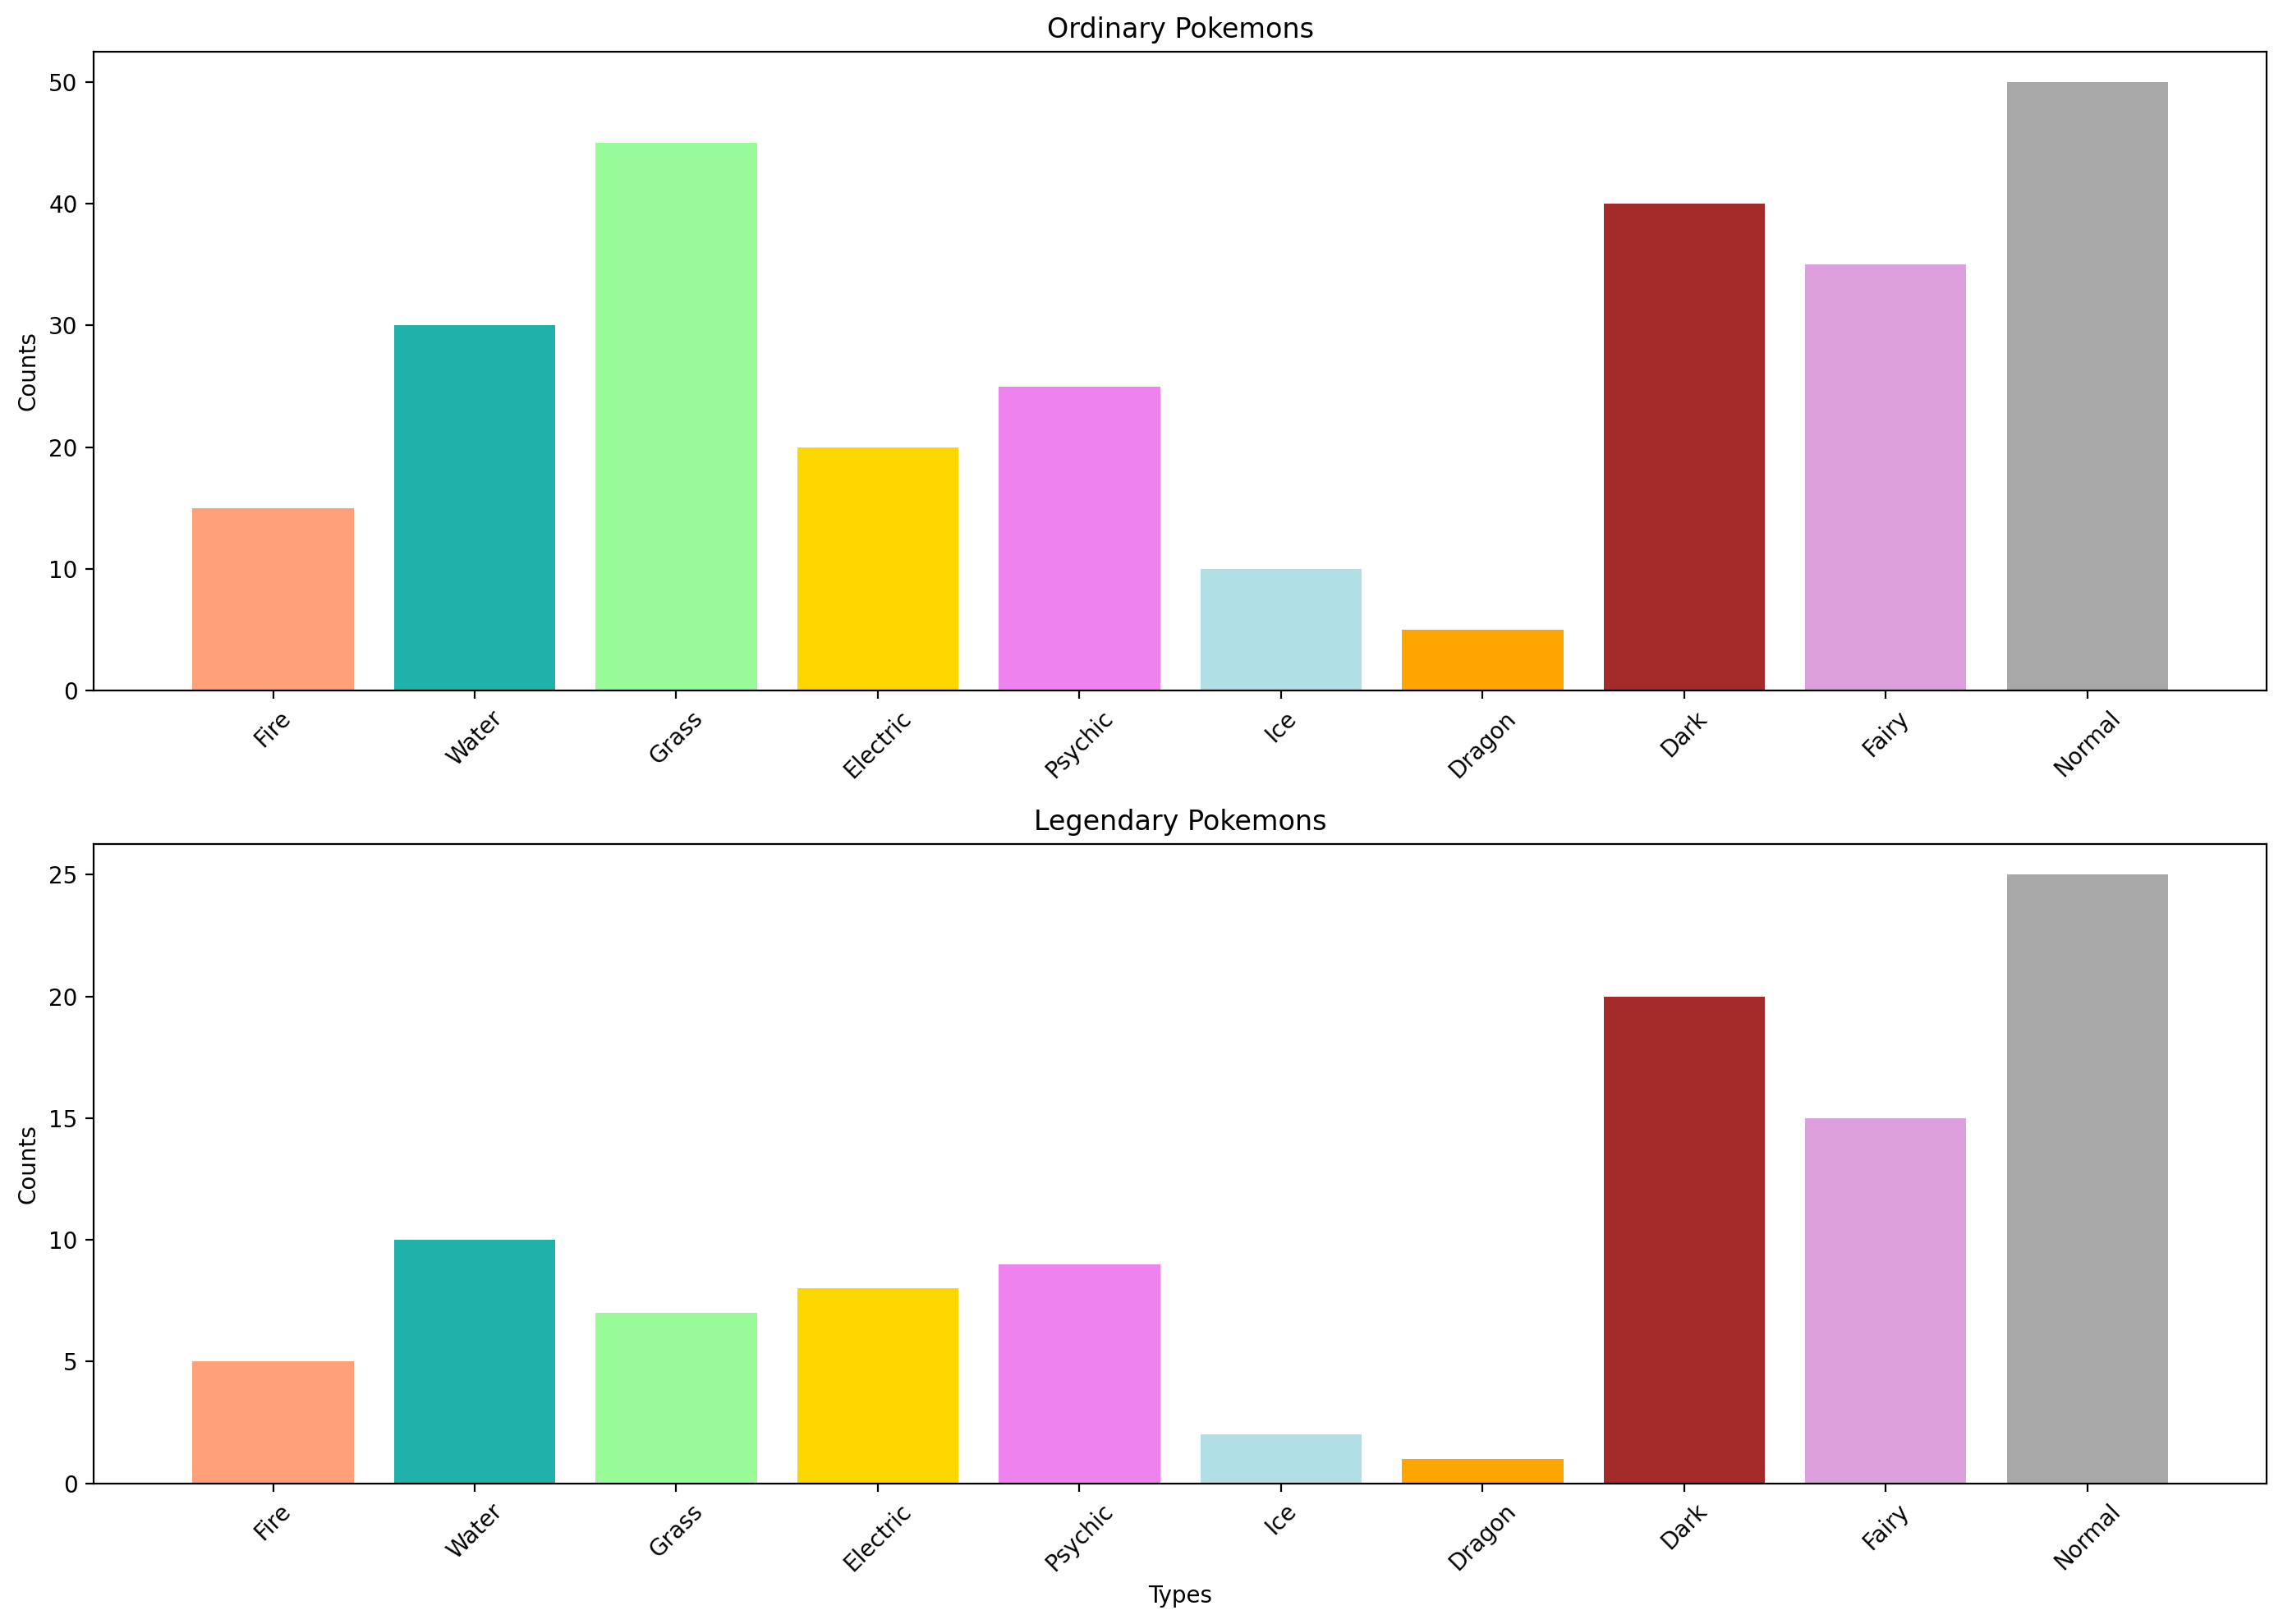

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 포켓몬 타입과 해당 타입의 수를 나타내는 데이터
types = ['Fire', 'Water', 'Grass', 'Electric', 'Psychic', 'Ice', 'Dragon', 'Dark', 'Fairy', 'Normal']
ordinary_counts = [15, 30, 45, 20, 25, 10, 5, 40, 35, 50]  # Ordinary Pokemons
legendary_counts = [5, 10, 7, 8, 9, 2, 1, 20, 15, 25]  # Legendary Pokemons

# 색상 리스트
colors = ['#FFA07A', '#20B2AA', '#98FB98', '#FFD700', '#EE82EE', '#B0E0E6', '#FFA500', '#A52A2A', '#DDA0DD', '#A8A8A8']

# 그래프 생성
fig, axs = plt.subplots(2, figsize=(14, 10))

# Ordinary Pokemons 바 그래프 생성
axs[0].bar(types, ordinary_counts, color=colors)
axs[0].set_title('Ordinary Pokemons')
axs[0].set_ylabel('Counts')

# Legendary Pokemons 바 그래프 생성
axs[1].bar(types, legendary_counts, color=colors)
axs[1].set_title('Legendary Pokemons')
axs[1].set_xlabel('Types')
axs[1].set_ylabel('Counts')

# x축에 포켓몬 타입 이름 표시
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()


그렇다면, 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해 봅시다.
sort_value를 활용해 높은 것부터 낮은 순으로 정렬해 보았습니다.

In [31]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.5
Dragon,0.375
Psychic,0.245614
Steel,0.148148
Ground,0.125
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 Flying으로, 50%의 비율을 갖습니다.
날아다니는 포켓몬은 꽤 높은 비율로 전설의 포켓몬임을 알 수 있군요!

Type 2 데이터 분포 plot

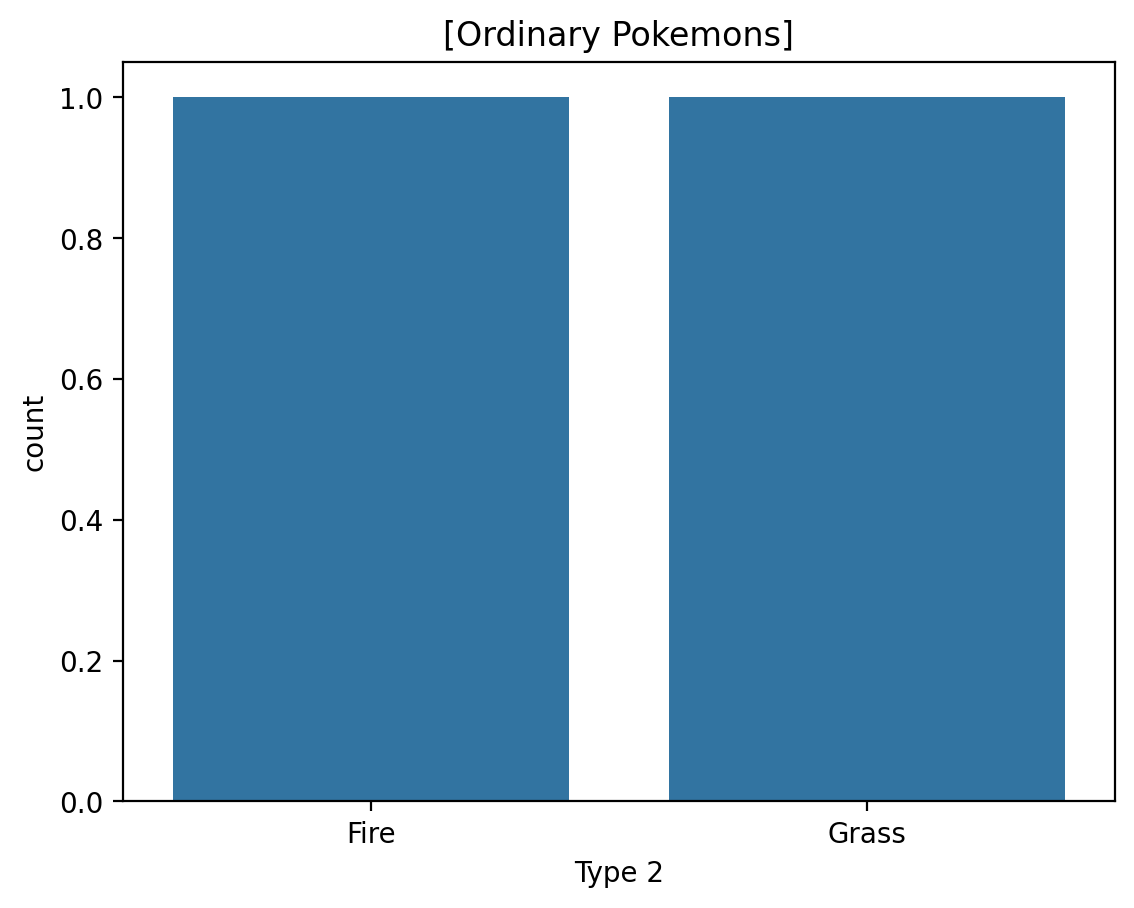

In [32]:
import pandas as pd

# 'df'를 적절한 값으로 정의합니다. 예를 들어, pandas DataFrame을 생성합니다.
df = pd.DataFrame({
    'Legendary': [False, True, False, True],  # 이는 예시입니다. 실제 데이터에 맞게 수정하세요.
    'Type 2': ['Fire', 'Water', 'Grass', 'Electric']  # 이는 예시입니다. 실제 데이터에 맞게 수정하세요.
})

# 이제 'df'를 사용하여 그래프를 그릴 수 있습니다.
sns.countplot(data=df[df['Legendary']==False], x='Type 2')  # 일반 포켓몬의 'Type 2' 속성에 대한 막대 그래프를 그립니다.
plt.title("[Ordinary Pokemons]")

plt.show()


Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 보입니다.
Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

역시 피벗 테이블로도 확인해 볼까요?

In [33]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
# pandas 라이브러리를 사용하여 피벗 테이블을 만듭니다.
pivot_table_Type2 = pd.pivot_table(df, values='Legendary', index='Type 2', aggfunc=np.sum)

# 피벗 테이블을 출력합니다.
print(pivot_table_Type2)


          Legendary
Type 2             
Electric          1
Fire              0
Grass             0
Water             1



Type 2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.

## 1-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합

Total : 모든 스탯의 총합

데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가집니다. 포켓몬 데이터의 Total 컬럼은 이 6가지 속성값의 총합입니다.

모든 스탯의 종류를 stats라는 변수에 저장해 보겠습니다.

In [34]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [35]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


네, 첫 번째 포켓몬에 대해서는 Total 값이 318로 일치하는군요.

전체 포켓몬에 대해 Total 값이 stats의 총합과 같은지 확인해 봅시다.
아래와 같이 pokemon['Total'].values와 pokemon[stats].values들의 총합이 같은 포켓몬의 개수를 sum으로 확인하겠습니다.
여기서 stats의 경우에는 포켓몬마다 가로 방향으로 더해야 하기 때문에 axis=1이 들어가야 하는 것을 주목하세요!

In [36]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
# stats는 포켓몬의 통계를 나타내는 열들의 리스트입니다.
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 'pokemon[stats].values'의 총합과 'pokemon['Total'].values'가 같은지 비교합니다.
equal_totals = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

# 비교 결과가 True인 포켓몬의 수를 계산합니다.
num_equal_totals = equal_totals.sum()

print(f"포켓몬 중 'Total' 값과 통계의 총합이 같은 포켓몬의 수는 {num_equal_totals}마리입니다.")


포켓몬 중 'Total' 값과 통계의 총합이 같은 포켓몬의 수는 799마리입니다.


네, Total값과 모든 stats의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 799마리군요.

Total값에 따른 분포 plot

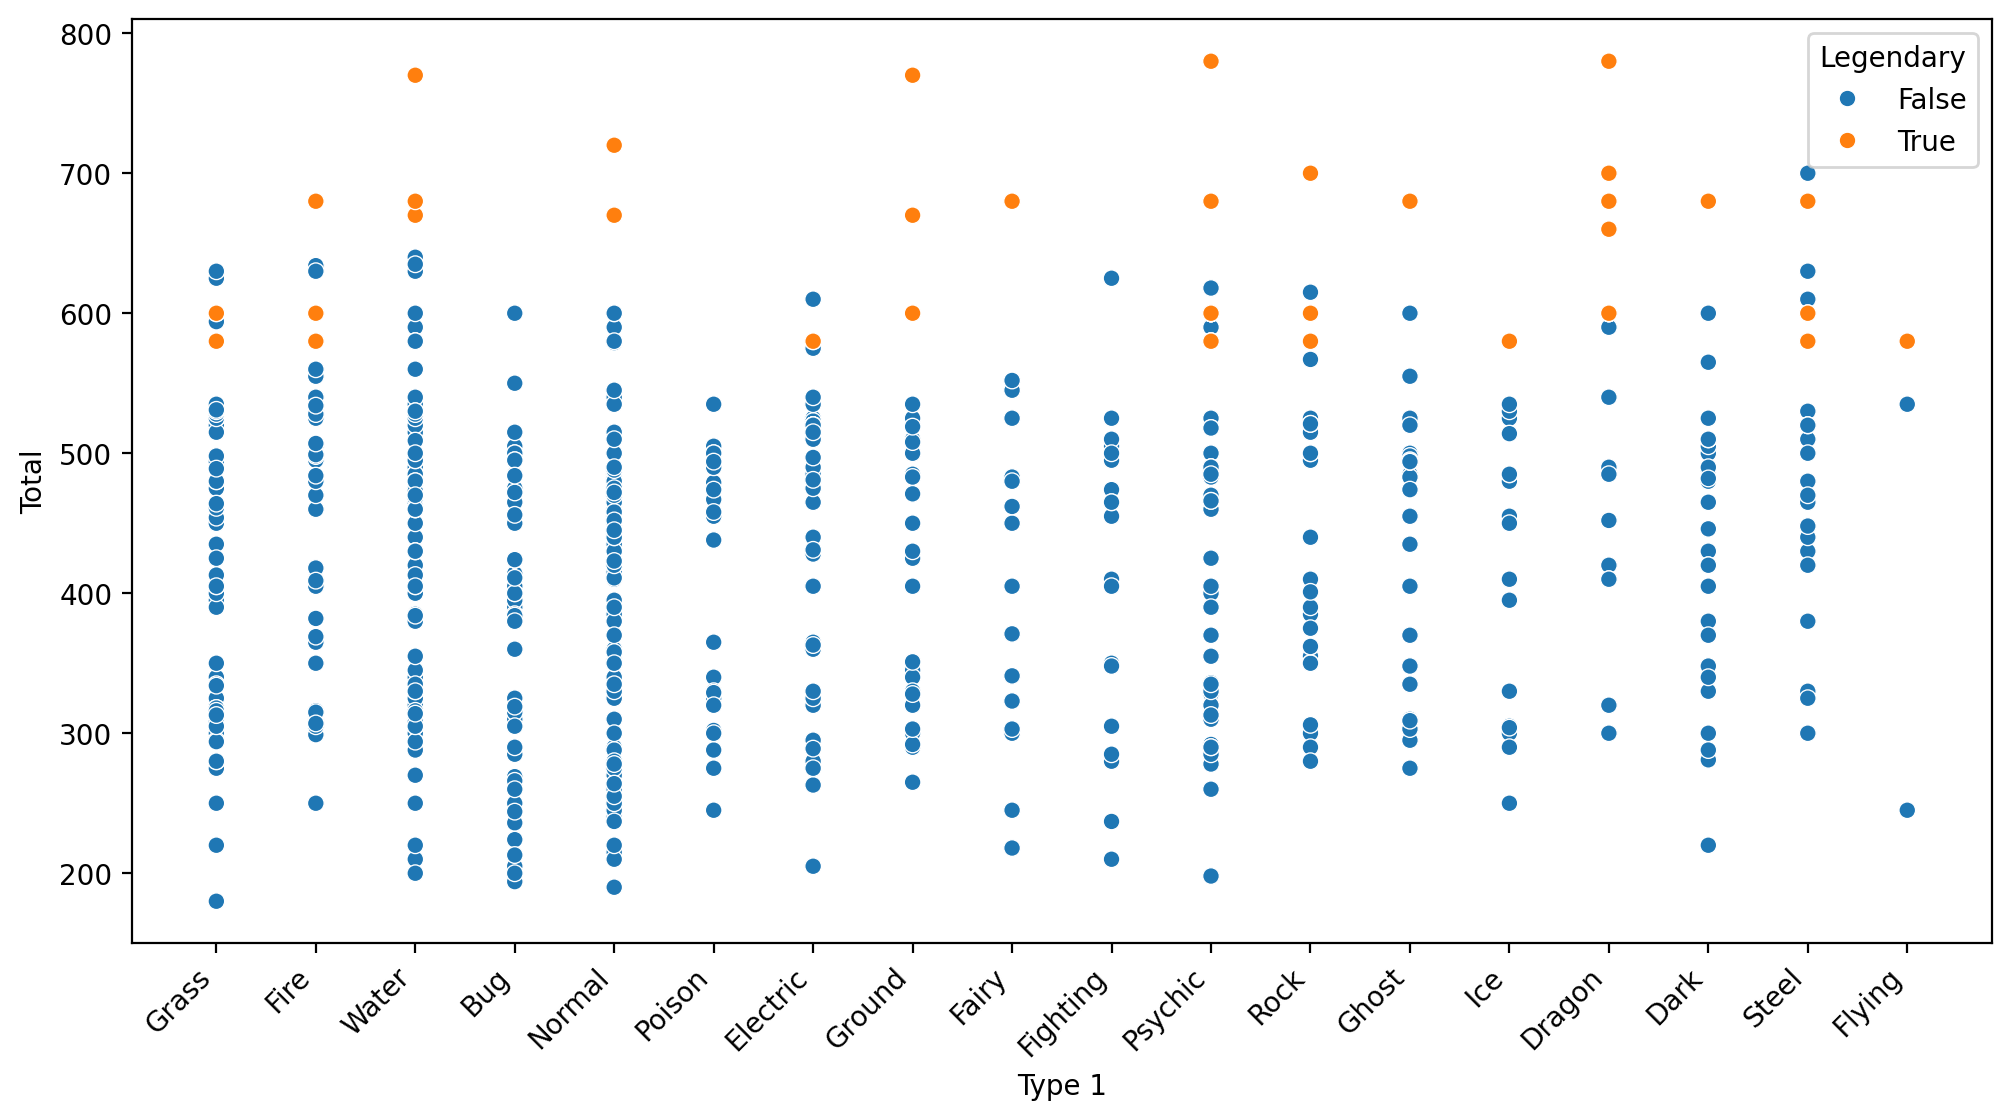

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")

# x축 레이블 간결하게 정리
plt.xticks(rotation=45, ha='right')

plt.show()


위의 코드는 x축의 레이블을 45도 회전시켜서 표시하므로, 레이블이 서로 겹치지 않고 깔끔하게 보입니다

Legendary 여부에 따라 색깔(hue)을 달리하도록 했습니다. 점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것이 확인됩니다.

전설의 포켓몬은 왕 쎄군요..!

## 1-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯

세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

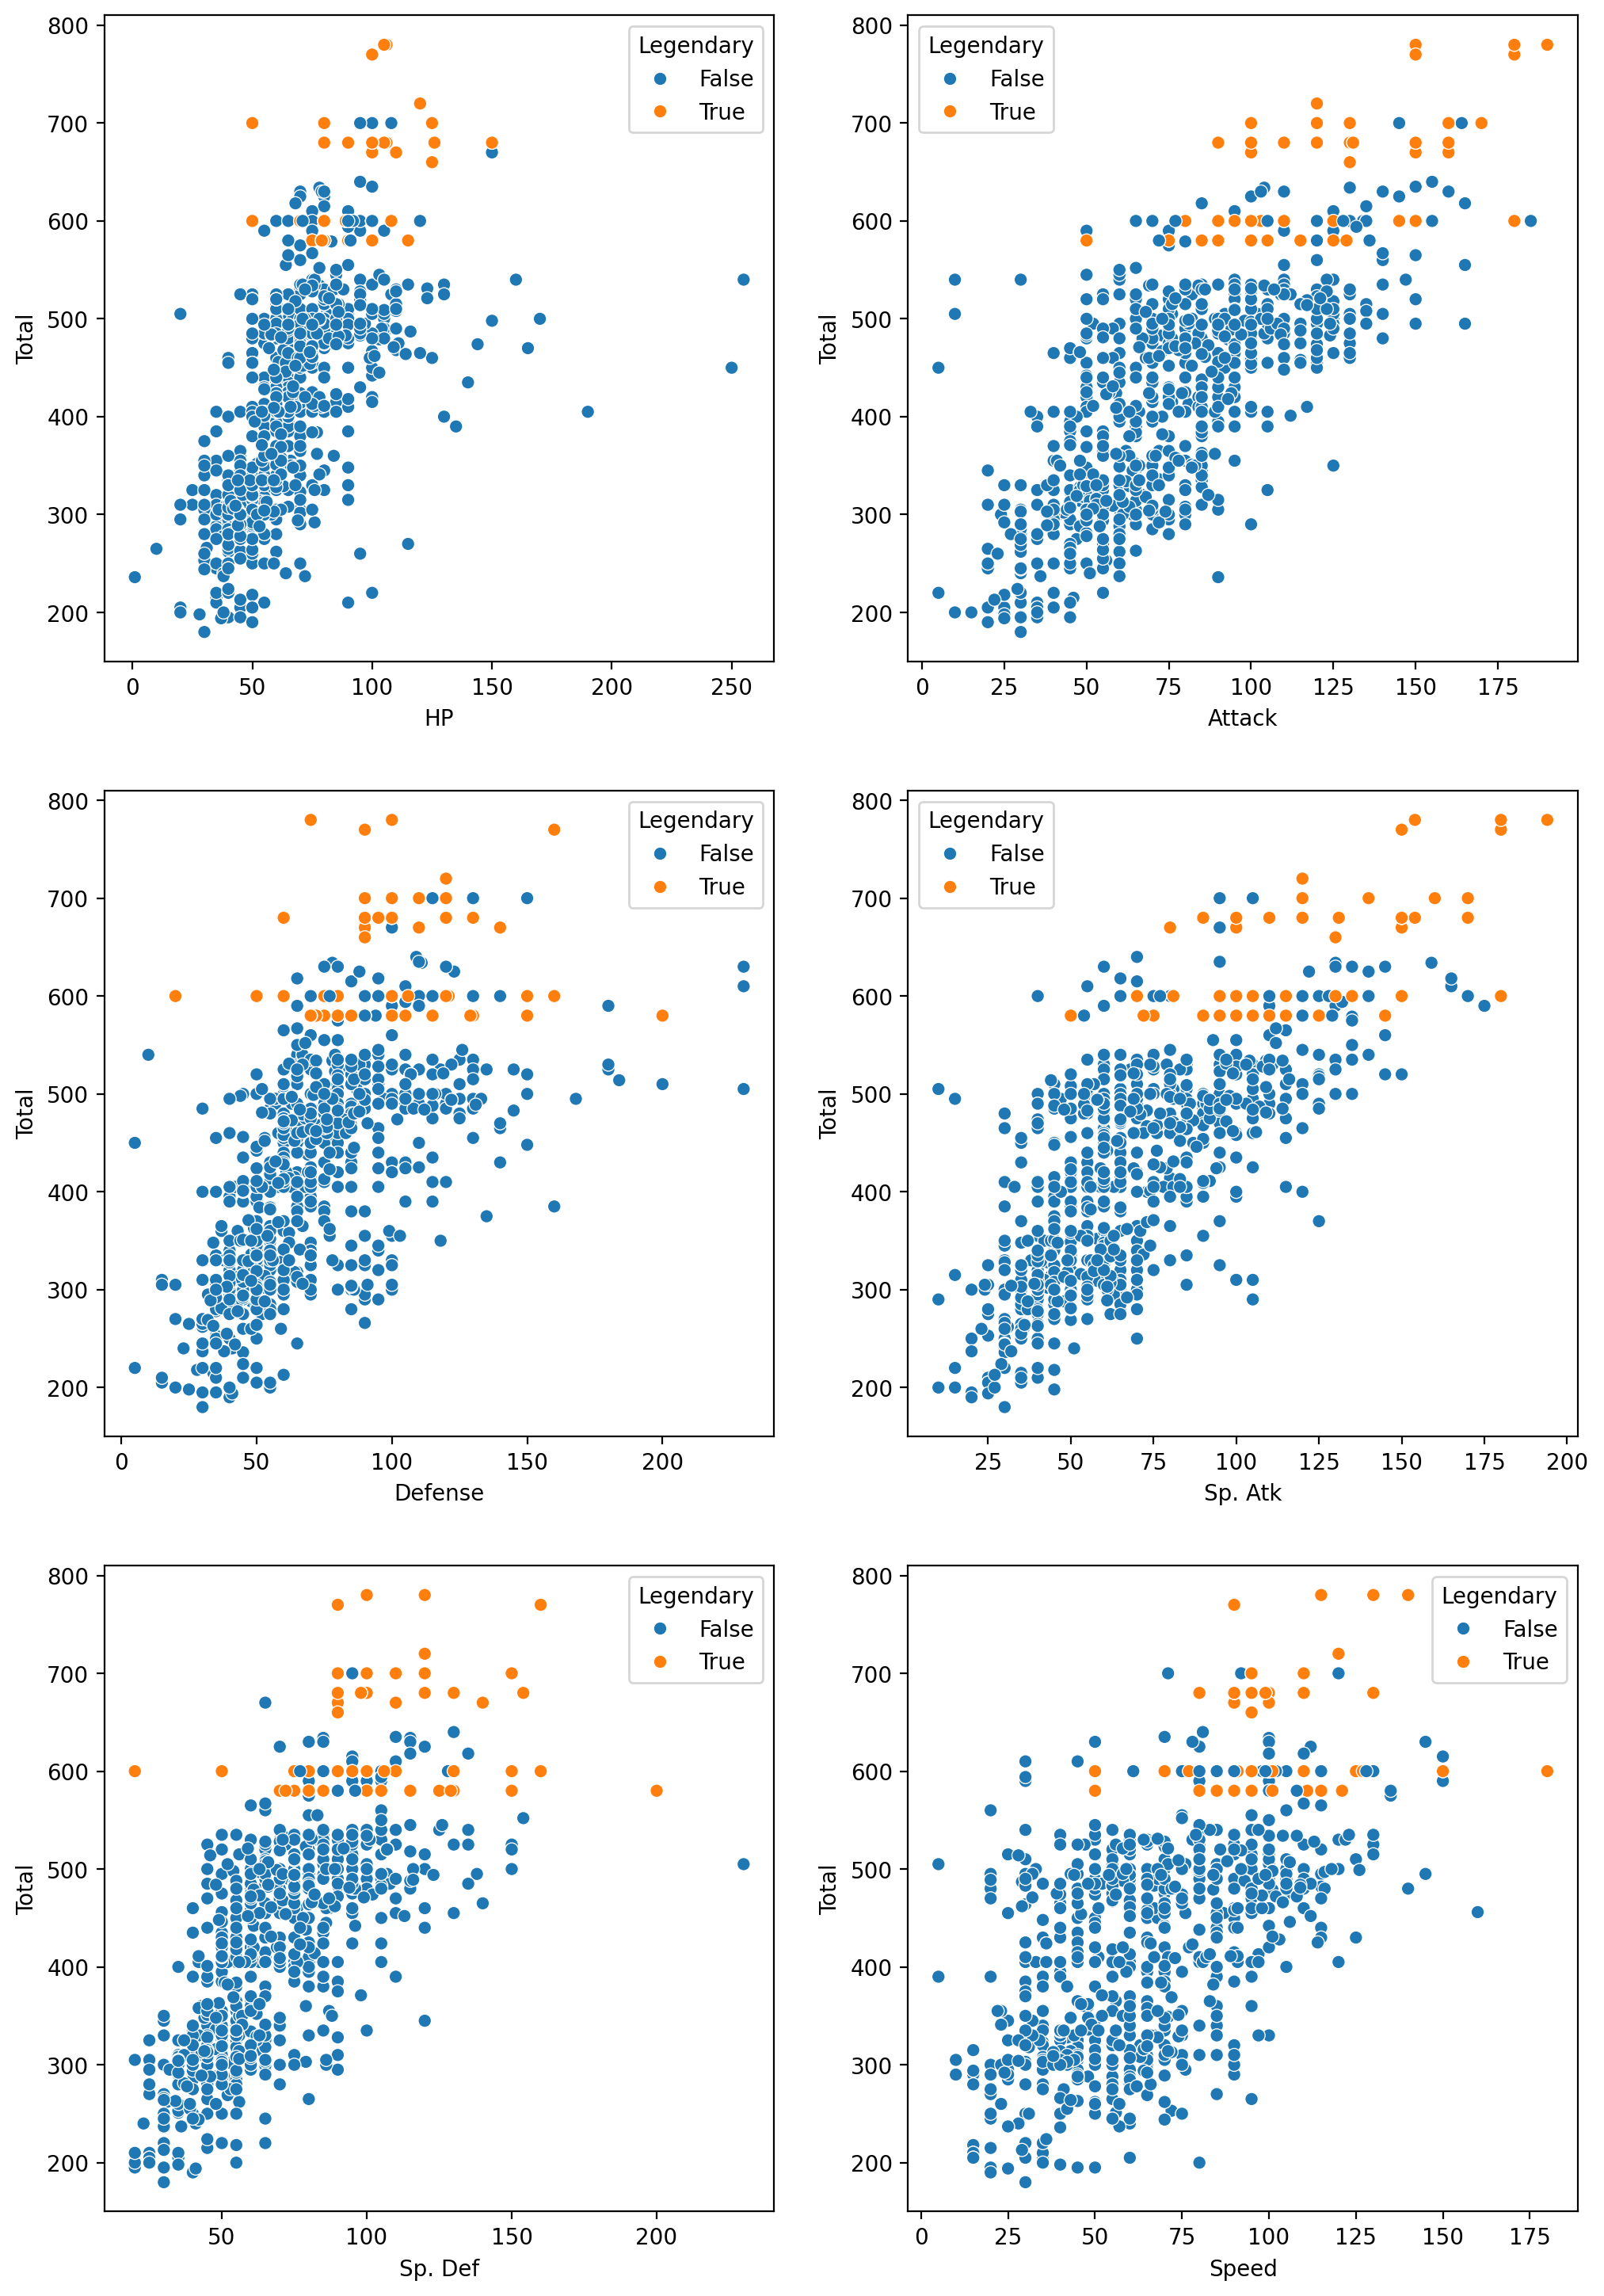

In [38]:
# Q. 다음 코드의 빈칸을 채워주세요.
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()


각 스탯에 대한 분석

HP, Defense, Sp. Def
전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.

그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)

Attack, Sp. Atk, Speed
이 세 가지 스탯은 Total과 거의 비례합니다.
전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

1-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대

Generation : 포켓몬의 세대

<ipython-input-39-7a2e15108e4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ordinary, x="Generation", palette='Set2').set_xlabel('')
<ipython-input-39-7a2e15108e4d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="Generation", palette='Set3').set_xlabel('')


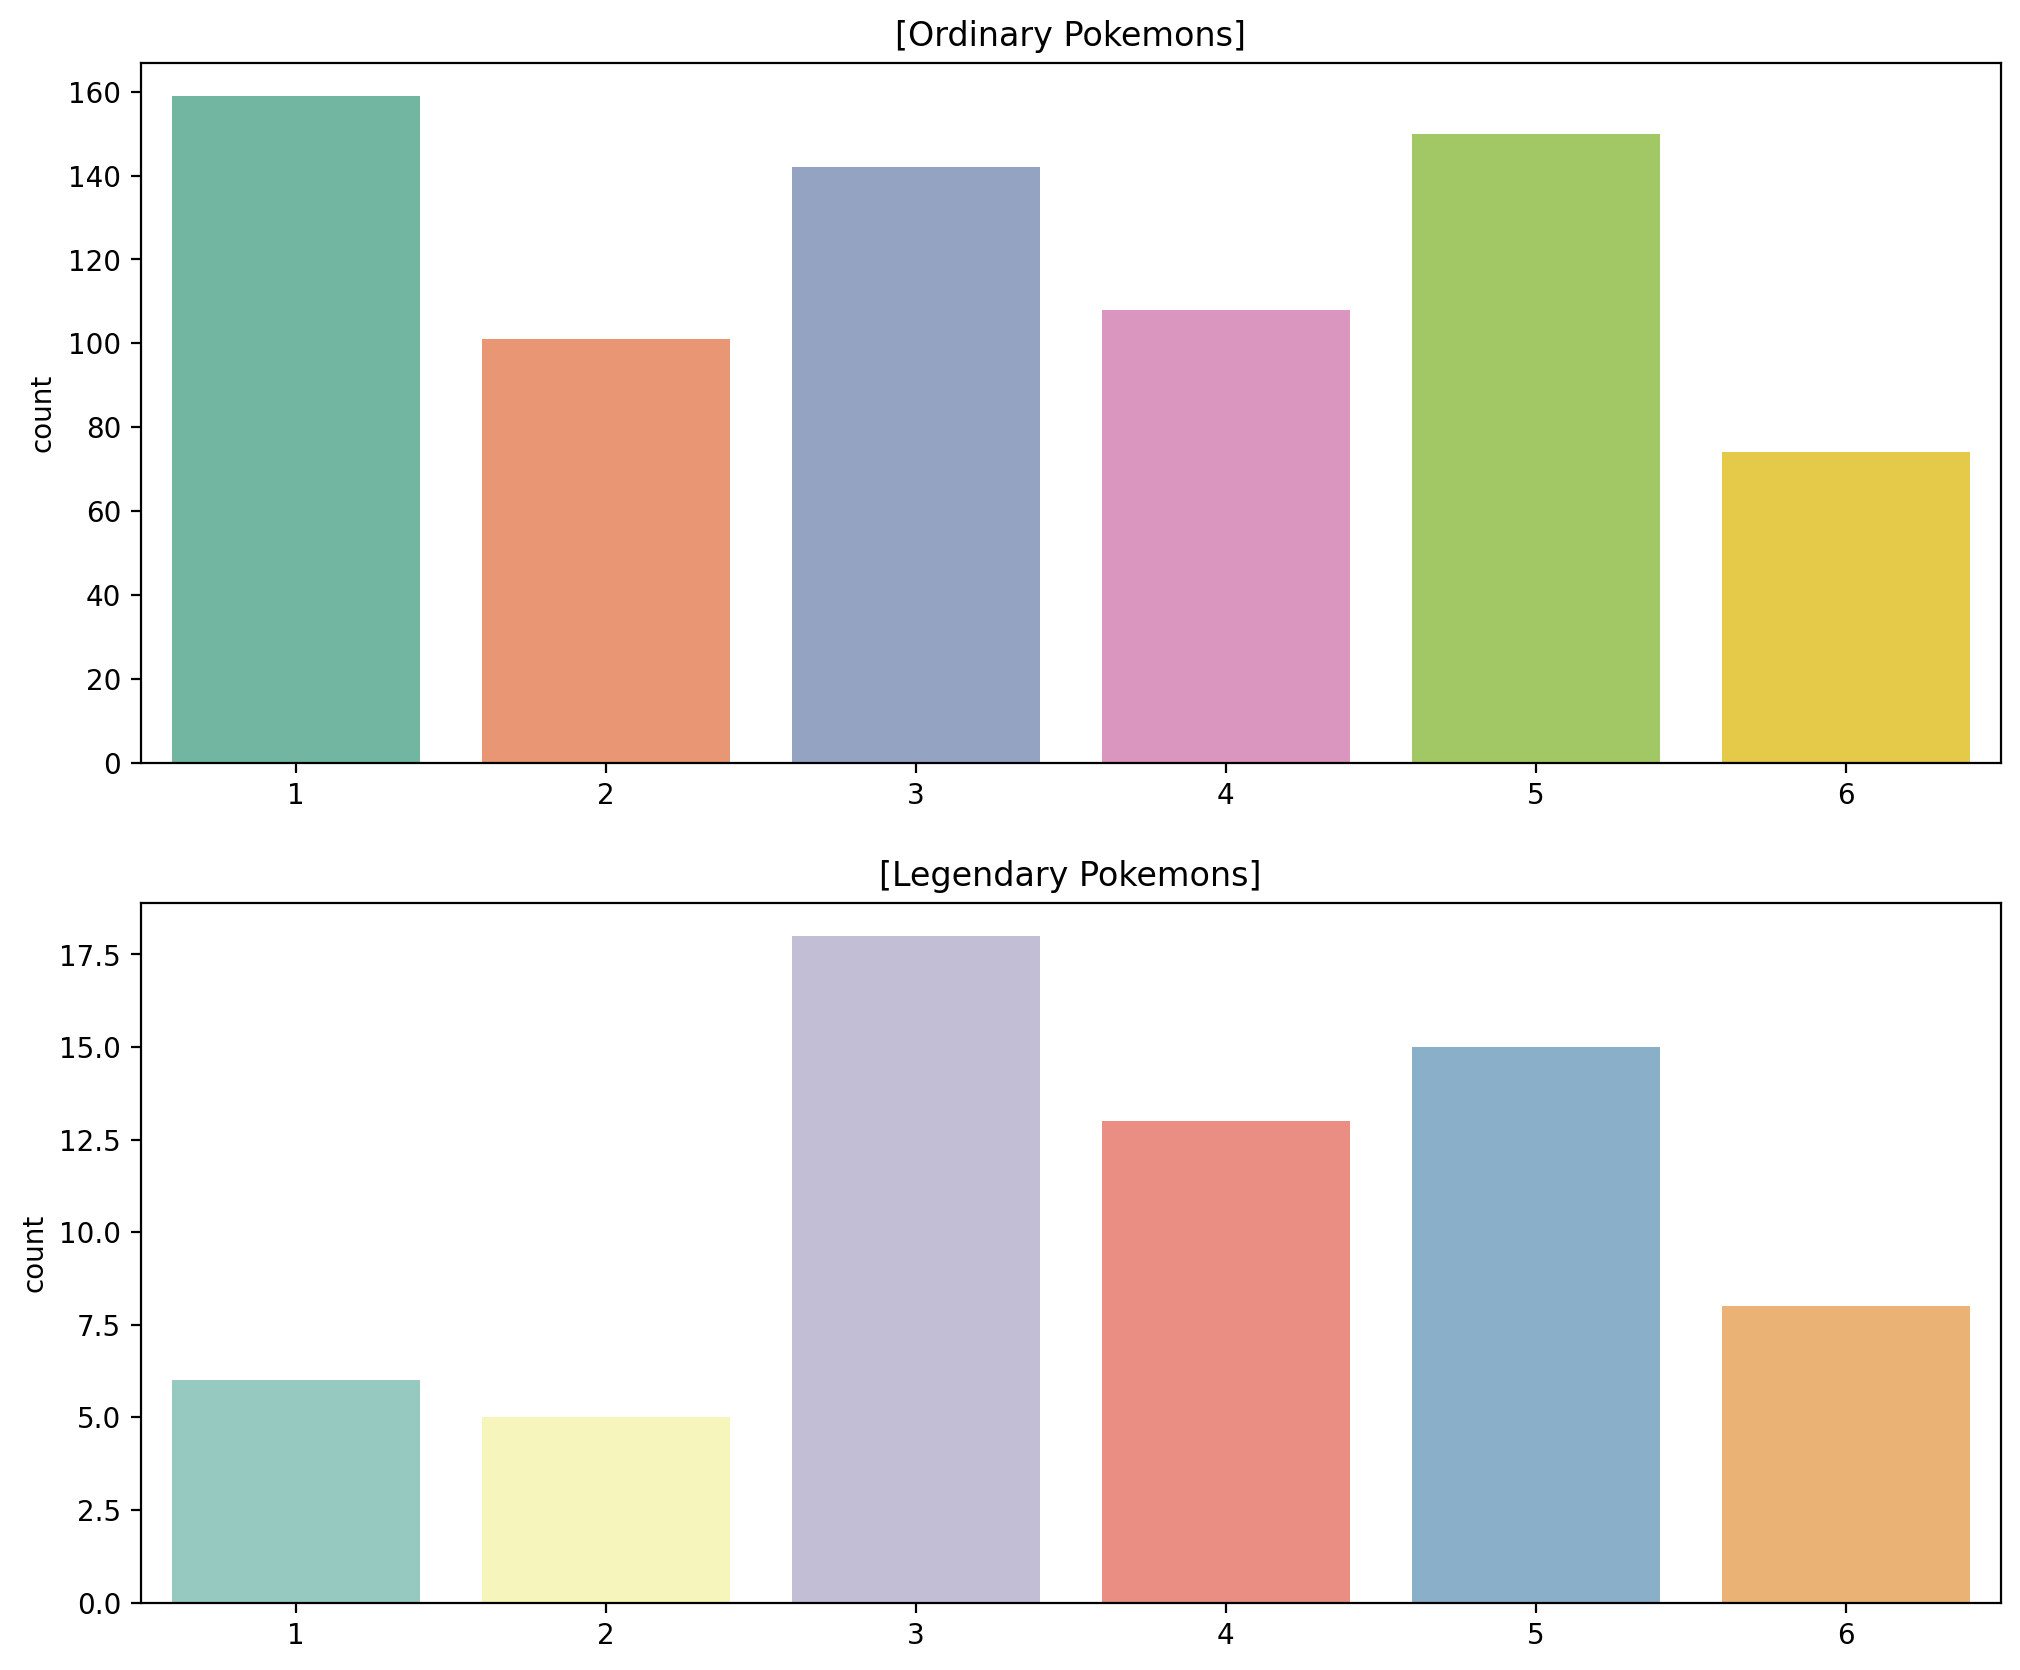

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation", palette='Set2').set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation", palette='Set3').set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()


전설의 포켓몬은 1, 2세대에는 많지 않았나 보네요. 3세대부터 많아졌다가, 6세대에 다시 줄어든 것을 확인할 수 있습니다.

## 1-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total값

지금까지 모든 컬럼의 데이터를 확인하였습니다.

우리의 목표는 전설의 포켓몬을 일반 포켓몬에서 분류해 내는 것이니, 각각이 가지는 특징들을 세분화해서 확인해 봐야겠죠!
이제 특별히 legendary 포켓몬과 Ordinary 포켓몬을 분리해서 각각 분석해 보겠습니다.

전설의 포켓몬의 Total 값

먼저 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인해 봅시다

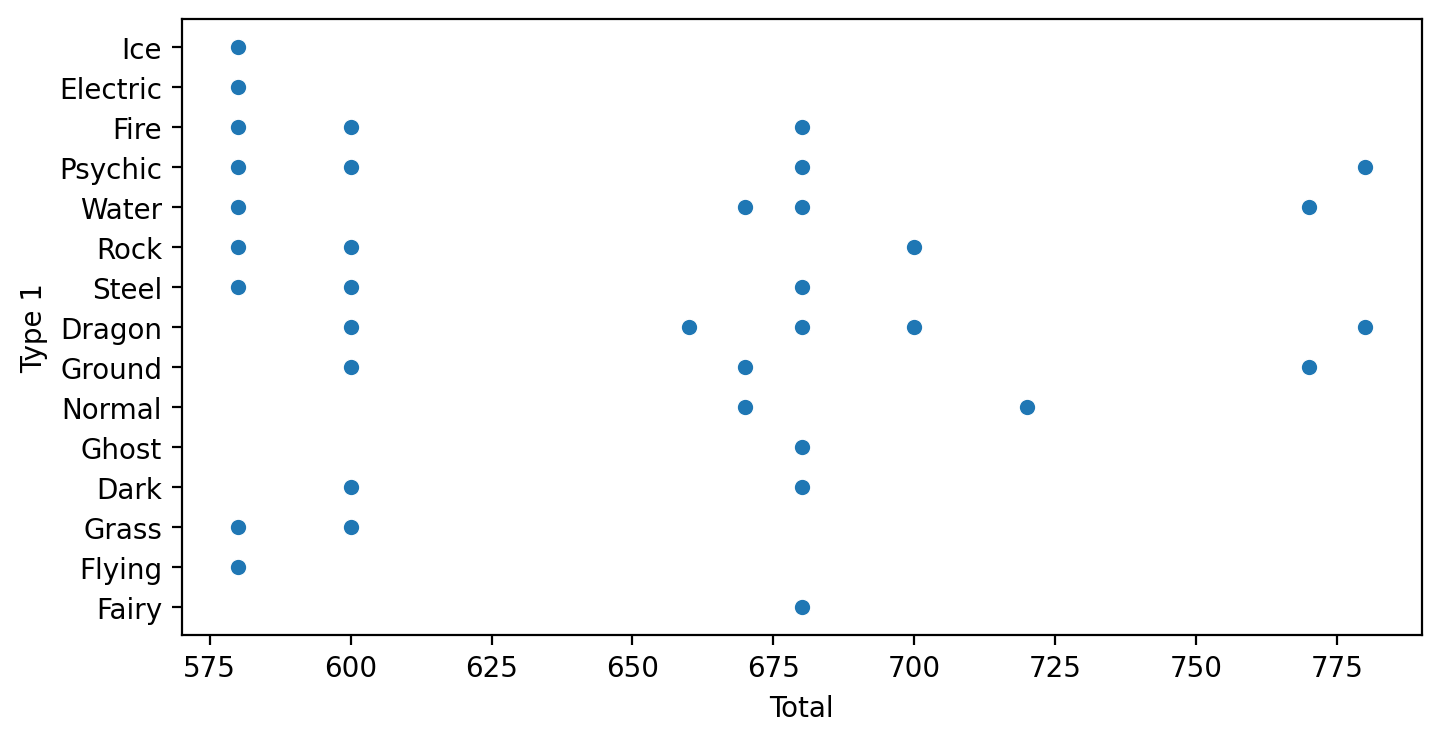

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

앗, 여기서 한 가지 특징이 보이는 것 같습니다.
바로, 전설의 포켓몬들의 Total값들이 600과 같은 특정한 값에 몰려있다는 것이죠! 무언가 이상하지 않나요?

실제로 전설의 포켓몬이 가지는 Total값들의 집합을 확인해 봅시다.

In [ ]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


실제로 단 9가지 값 밖에 존재하지 않는군요!
그래프로도 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인해 봅시다.

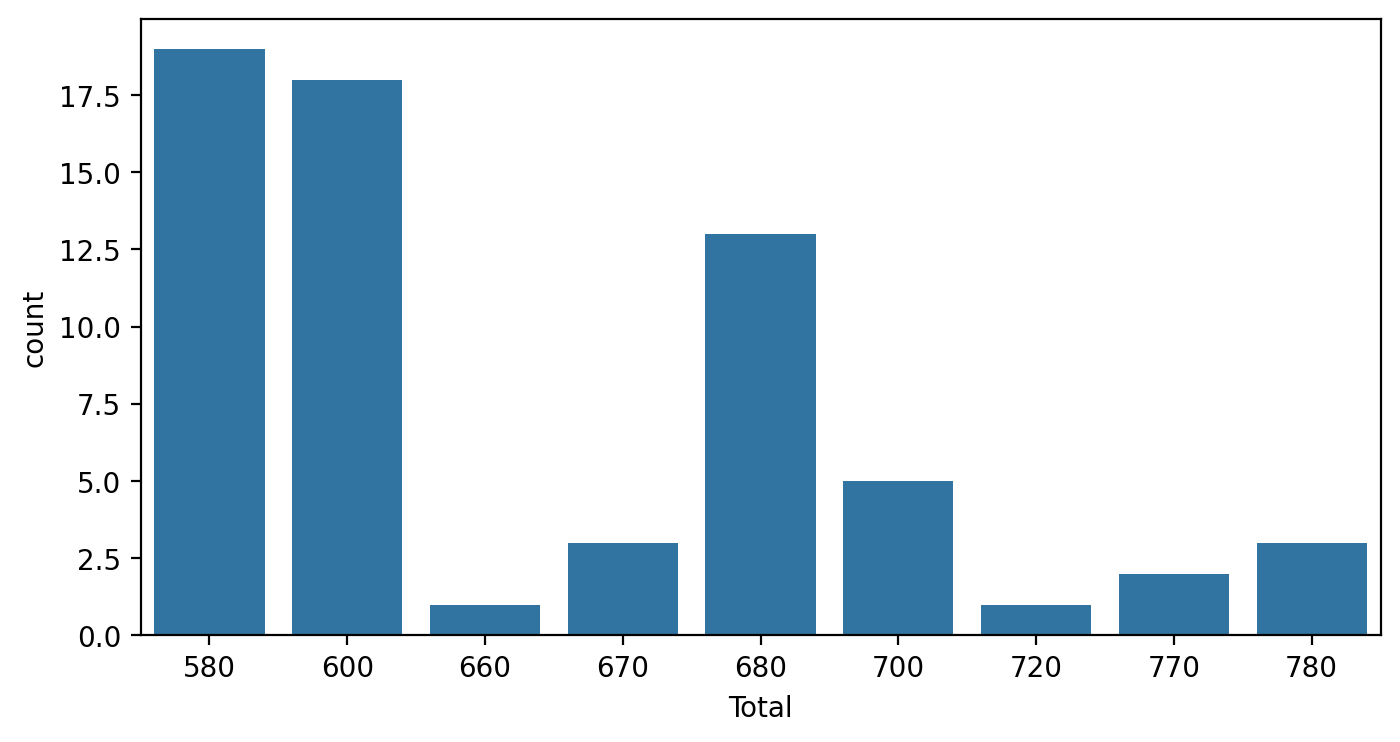

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

<ipython-input-42-6f26d198b19e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=legendary, x="Total", palette='Set2')


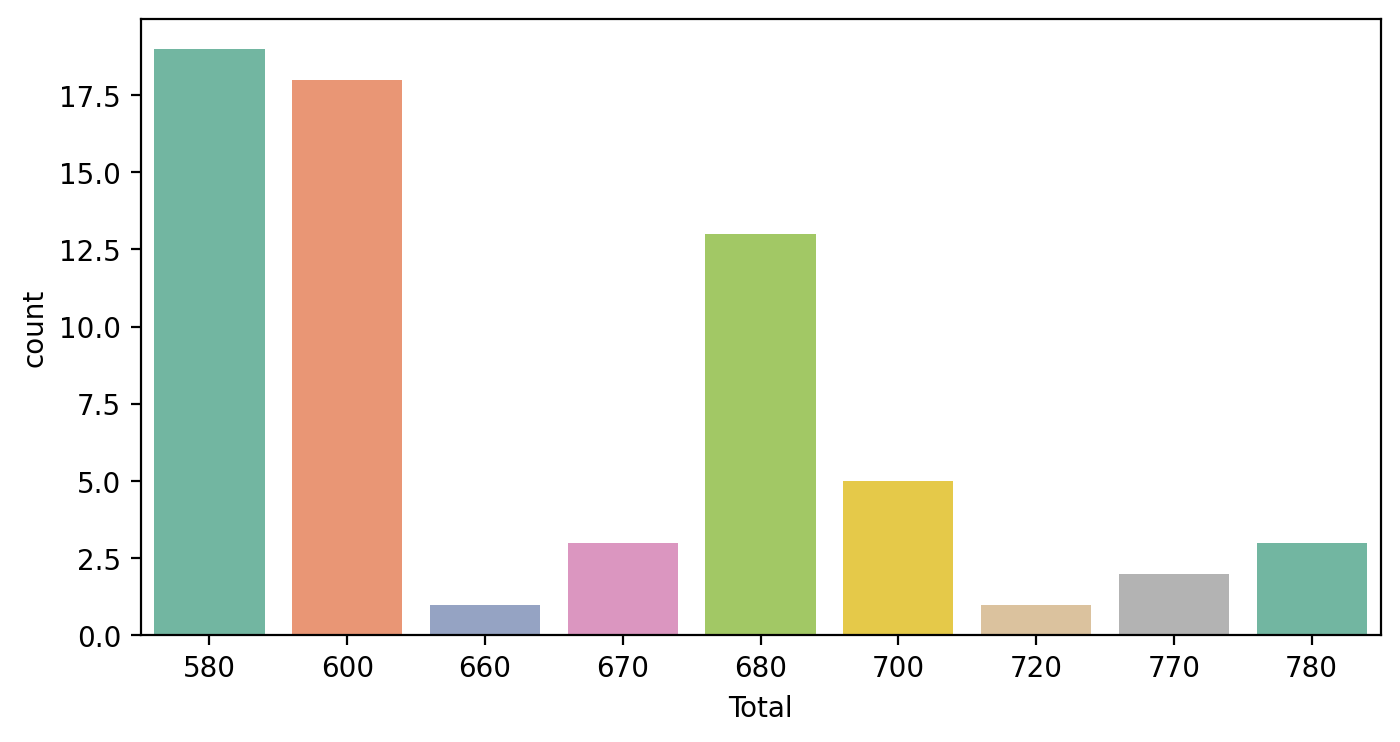

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total", palette='Set2')
plt.show()


흠, 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것은,

In [43]:
round(65 / 9, 2)

7.22

약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미와 같습니다. 이는 언뜻 봐도 꽤 높은 값인 것 같은 느낌을 주네요.

그렇다면 ordinary 포켓몬은 어떨까요? 같은 방법으로 다시 확인해 봅시다.

In [44]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
# 'ordinary'는 일반 포켓몬을 나타내는 DataFrame입니다.
total_values = ordinary['Total'].values

print(f"일반 포켓몬의 'Total' 값 집합: {total_values}")


일반 포켓몬의 'Total' 값 집합: [318 405 525 625 309 405 534 634 634 314 405 530 630 195 205 395 195 205
 395 495 251 349 479 579 253 413 262 442 288 438 320 485 300 450 275 365
 505 365 505 323 483 299 505 270 435 245 455 320 395 490 285 405 305 450
 265 405 290 440 320 500 305 455 350 555 300 385 510 310 400 500 590 305
 405 505 300 390 490 335 515 300 390 495 410 500 315 490 590 325 465 352
 310 460 325 475 325 500 305 525 310 405 500 600 385 328 483 325 475 330
 480 325 520 320 425 455 455 385 340 490 345 485 450 435 490 590 295 440
 320 450 340 520 460 500 455 490 495 500 600 490 200 540 640 535 288 325
 525 525 525 395 355 495 355 495 515 615 540 300 420 600 600 318 405 525
 309 405 534 314 405 530 215 415 262 442 265 390 250 390 535 330 460 205
 218 210 245 405 320 470 280 365 510 610 490 250 420 410 500 250 340 460
 360 180 425 390 210 430 525 525 405 490 435 336 405 455 290 465 415 430
 510 610 300 450 430 500 600 505 500 600 430 330 500 250 410 250 450 380
 300 480 330 465 465 330 500 

In [45]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
# 'total_values'는 일반 포켓몬의 'Total' 값 집합입니다.
length = len(total_values)

print(f"일반 포켓몬의 'Total' 값 집합의 크기(길이)는 {length}입니다.")


일반 포켓몬의 'Total' 값 집합의 크기(길이)는 734입니다.


일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (799 - 65), 즉 734마리이므로,

In [46]:
round(734 / 195, 2)

3.76

약 3.76마리만 같은 Total 스탯 값을 가지는군요.

이로써 다음의 두 가지를 알 수 있습니다.

Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
: 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
: Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

## 1-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

데이터를 보고 있으면 한 가지 더 특이한 점이 있습니다. 바로 이름!
전설의 포켓몬들의 이름을 보면, 특정 단어가 들어가 있는 이름, 또는 긴 이름을 가진 경우가 많음을 확인할 수 있습니다.

특정 단어가 들어가 있는 이름
특정 단어가 들어가 있는 이름이 많은지, 바로 확인해 봅시다.
아래 행들은 비슷한 이름을 가진 포켓몬들의 모임입니다. 이들을 pd.concat으로 합쳐보겠습니다.

In [47]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


어떤가요? 한눈에 봐도 이름들이 비슷한 경향을 띠는 것을 볼 수 있습니다.
이름은 모든 포켓몬이 각각 다른 유일한(unique) 값들로 이루어진 것을 확인했었는데, 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 거죠.

특히, 아래 이름들은 모두 세트로 이름이 지어져 있다는 것을 어렵지 않게 확인할 수 있습니다.

"MewTwo", "Latias", "Latios", "Kyogre", "Groudon", "Rayquaza", "Kyurem" 등의 포켓몬은 비슷한 이름을 가진 포켓몬이 다수 존재합니다.
또는, 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 존재합니다.

In [48]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


이렇게 이름에 forme가 들어가면 이는 전설의 포켓몬일 확률이 아주 높겠군요!

긴 이름
위와 비슷한 이유로, 전설의 포켓몬은 이름의 길이도 긴 경우가 많습니다.
데이터셋에 이름 길이 컬럼을 생성해서 비교해 보도록 하겠습니다.

## 1-13. 모델에 넣기 위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?

데이터 분석을 통해 머신러닝을 수행하고 싶다면, 데이터를 모델에 입력할 수 있는 형태로 변환하는 것이 매우 중요합니다.

머신러닝을 수행할 모델은 문자열 데이터를 처리할 수 없기 때문에 이를 적절한 숫자 데이터 또는 True, False를 나타내는 부울(bool) 데이터 등으로 전처리하는 과정이 필요합니다.
따라서 지금까지 수행한 EDA 결과에 따라 이름 컬럼을 모델이 연산할 수 있는 형태로 처리를 해 보도록 하겠습니다.

앞서 확인한 EDA 과정에서 이름은 전설의 포켓몬인지 아닌지를 결정하는 중요한 특징 중 하나였죠.
따라서 이름에 관해서는 두 가지를 중점적으로 처리하겠습니다.

1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

(1) 이름의 길이가 10 이상인가 아닌가
이름의 길이를 확인할 수 있는 name_count 컬럼을 생성합니다. 아까 생성한 방법과 같지만, 이번엔 전체 데이터가 있는 pokemon 데이터 프레임에 생성합니다.

In [49]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


또한 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성합니다.

In [50]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


다만, 전설의 포켓몬을 분류하는 데에 이름의 길잇값 자체를 가진 name_count 컬럼이 더 유리할지, 혹은 long_name이 더 유리할지는 아직 모릅니다.

따라서 모델을 학습시킬 때에는 두 가지를 모두 활용해 볼 것입니다.

## 1-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

다음으로 할 일은 전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만드는 것입니다.
이름에 어떤 토큰이 있으면 전설의 포켓몬일 확률이 높을지를 찾아보는 것이죠.

토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다.
포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.

한 단어면 ex. Venusaur
두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다.

pandas의 isalpha() 함수
우리는 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점입니다.
따라서 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인하도록 하겠습니다.

In [51]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


모든 띄어쓰기가 없어진 것이 확인되는군요.
이제 isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인해 봅시다.

In [52]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

KeyError: 'name_isalpha'

In [53]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

KeyError: 'name_isalpha'

In [54]:
import pandas as pd

# 예시 DataFrame 생성
data = {'name': ['Pikachu', 'Charmander', 'Eevee', 'Bulbasaur', 'Jigglypuff', 'Mr. Mime', 'Farfetch\'d']}
pokemon = pd.DataFrame(data)

# 'name_isalpha' 열이 존재하는지 확인하고, 존재하지 않으면 생성
if 'name_isalpha' not in pokemon.columns:
    pokemon['name_isalpha'] = pokemon['name'].apply(lambda x: x.isalpha())

# 'name_isalpha' 열이 False인 행의 개수 출력 및 해당 행 출력
print(pokemon[pokemon["name_isalpha"] == False].shape)
print(pokemon[pokemon["name_isalpha"] == False])


(2, 2)
         name  name_isalpha
5    Mr. Mime         False
6  Farfetch'd         False


In [55]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(2, 2)


,name,name_isalpha
5,Mr. Mime,False
6,Farfetch'd,False


In [56]:
import pandas as pd

# 예시 DataFrame 생성
data = {
    'Name': ['Nidoran♀', 'Nidoran♂', 'Farfetch\'d', 'Mr. Mime', 'Porygon2', 'Ho-oh', 'Mime Jr.', 'Porygon-Z', 'Zygarde50% Forme'],
    'Type 1': ['Poison', 'Poison', 'Normal', 'Psychic', 'Normal', 'Fire', 'Psychic', 'Normal', 'Dragon'],
    'Type 2': [None, None, 'Flying', 'Fairy', None, 'Flying', 'Fairy', None, 'Ground'],
    'Total': [275, 273, 352, 460, 515, 680, 310, 535, 600],
    'HP': [55, 46, 52, 40, 85, 106, 20, 85, 108],
    'Attack': [47, 57, 65, 45, 80, 130, 25, 80, 100],
    'Defense': [52, 40, 55, 65, 90, 90, 45, 70, 121],
    'Sp. Atk': [40, 40, 58, 100, 105, 110, 70, 135, 81],
    'Sp. Def': [40, 40, 62, 120, 95, 154, 90, 75, 95],
    'Speed': [41, 50, 60, 90, 60, 90, 60, 90, 95],
    'Generation': [1, 1, 1, 1, 2, 2, 4, 4, 6],
    'Legendary': [False, False, False, False, False, True, False, False, True]
}
pokemon = pd.DataFrame(data)

# 추가 열 생성
pokemon['name_count'] = pokemon['Name'].apply(len)
pokemon['long_name'] = pokemon['name_count'] > 7
pokemon['Name_nospace'] = pokemon['Name'].str.replace(' ', '')
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# 'name_isalpha'가 False인 행의 개수 출력 및 해당 행 출력
print(pokemon[pokemon["name_isalpha"] == False].shape)
print(pokemon[pokemon["name_isalpha"] == False])


(9, 16)
               Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
0          Nidoran♀   Poison    None    275   55      47       52       40   
1          Nidoran♂   Poison    None    273   46      57       40       40   
2        Farfetch'd   Normal  Flying    352   52      65       55       58   
3          Mr. Mime  Psychic   Fairy    460   40      45       65      100   
4          Porygon2   Normal    None    515   85      80       90      105   
5             Ho-oh     Fire  Flying    680  106     130       90      110   
6          Mime Jr.  Psychic   Fairy    310   20      25       45       70   
7         Porygon-Z   Normal    None    535   85      80       70      135   
8  Zygarde50% Forme   Dragon  Ground    600  108     100      121       81   

   Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
0       40     41           1      False           8       True   
1       40     50           1      False           8       True   
2       62

이름에 알파벳이 아닌 것을 포함하는 경우는 9마리뿐이군요.

이 정도면 직접 이름을 바꿔줄 수 있겠습니다. 적당히 합리적으로 바꿔주겠습니다.
문자열을 원하는 다른 문자열로 바꾸고 싶을 때는 pandas의 replace 함수를 사용하면 됩니다.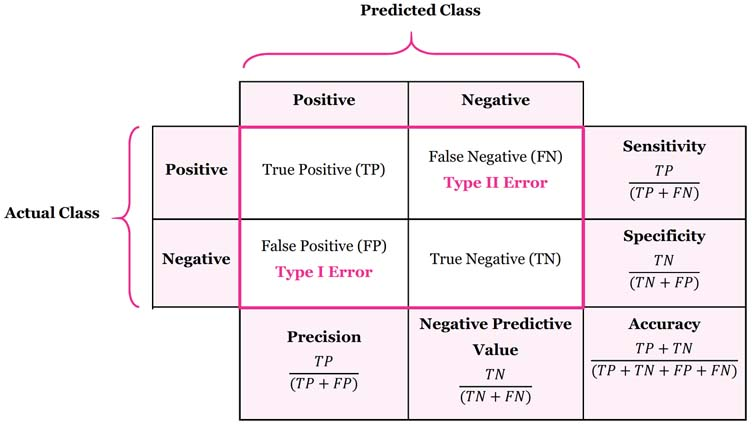

In [57]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

KeyError: "None of [Index([34, 37, 90, 131, 252, 270, 487, 525, 794], dtype='int64')] are in the [index]"

In [58]:
import pandas as pd

# 예시 DataFrame 생성
data = {
    'Name': ['Nidoran♀', 'Nidoran♂', 'Farfetch\'d', 'Mr. Mime', 'Porygon2', 'Ho-oh', 'Mime Jr.', 'Porygon-Z', 'Zygarde Forme'],
    'Type 1': ['Poison', 'Poison', 'Normal', 'Psychic', 'Normal', 'Fire', 'Psychic', 'Normal', 'Dragon'],
    'Type 2': [None, None, 'Flying', 'Fairy', None, 'Flying', 'Fairy', None, 'Ground'],
    'Total': [275, 273, 352, 460, 515, 680, 310, 535, 600],
    'HP': [55, 46, 52, 40, 85, 106, 20, 85, 108],
    'Attack': [47, 57, 65, 45, 80, 130, 25, 80, 100],
    'Defense': [52, 40, 55, 65, 90, 90, 45, 70, 121],
    'Sp. Atk': [40, 40, 58, 100, 105, 110, 70, 135, 81],
    'Sp. Def': [40, 40, 62, 120, 95, 154, 90, 75, 95],
    'Speed': [41, 50, 60, 90, 60, 90, 60, 90, 95],
    'Generation': [1, 1, 1, 1, 2, 2, 4, 4, 6],
    'Legendary': [False, False, False, False, False, True, False, False, True]
}

pokemon = pd.DataFrame(data)

# 인덱스를 원하는 값으로 설정
pokemon.index = [34, 37, 90, 131, 252, 270, 487, 525, 794]

# 추가 열 생성
pokemon['name_count'] = pokemon['Name'].apply(len)
pokemon['long_name'] = pokemon['name_count'] > 7
pokemon['Name_nospace'] = pokemon['Name'].str.replace(' ', '')
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# 'name_isalpha'가 False인 행의 개수 출력 및 해당 행 출력
print(pokemon[pokemon["name_isalpha"] == False].shape)
print(pokemon[pokemon["name_isalpha"] == False])


(8, 16)
           Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
34     Nidoran♀   Poison    None    275   55      47       52       40   
37     Nidoran♂   Poison    None    273   46      57       40       40   
90   Farfetch'd   Normal  Flying    352   52      65       55       58   
131    Mr. Mime  Psychic   Fairy    460   40      45       65      100   
252    Porygon2   Normal    None    515   85      80       90      105   
270       Ho-oh     Fire  Flying    680  106     130       90      110   
487    Mime Jr.  Psychic   Fairy    310   20      25       45       70   
525   Porygon-Z   Normal    None    535   85      80       70      135   

     Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40     41           1      False           8       True   
37        40     50           1      False           8       True   
90        62     60           1      False          10       True   
131      120     90           1      False       

다시 isalpha로 확인해 볼까요?


In [59]:
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.

# 'Name' 컬럼에서 공백을 제거하여 'Name_nospace' 컬럼을 만듭니다.
pokemon['Name_nospace'] = pokemon['Name'].str.replace(" ", "")

# 'Name_nospace' 컬럼이 알파벳 문자만으로 이루어졌는지 확인합니다.
pokemon['name_isalpha'] = pokemon['Name_nospace'].str.isalpha()

# 'name_isalpha' 값이 False인 포켓몬을 출력합니다.
print(pokemon[pokemon["name_isalpha"] == False])



           Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
34     Nidoran♀   Poison    None    275   55      47       52       40   
37     Nidoran♂   Poison    None    273   46      57       40       40   
90   Farfetch'd   Normal  Flying    352   52      65       55       58   
131    Mr. Mime  Psychic   Fairy    460   40      45       65      100   
252    Porygon2   Normal    None    515   85      80       90      105   
270       Ho-oh     Fire  Flying    680  106     130       90      110   
487    Mime Jr.  Psychic   Fairy    310   20      25       45       70   
525   Porygon-Z   Normal    None    535   85      80       70      135   

     Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40     41           1      False           8       True   
37        40     50           1      False           8       True   
90        62     60           1      False          10       True   
131      120     90           1      False           8   

데이터프레임이 비어있는 결과를 얻으려면, 특정 조건을 만족하지 않는 행을 필터링하거나, 존재하지 않는 행을 선택하는 등의 방법을 사용할 수 있습니다. 아래는 예시 코드입니다:

In [60]:
import pandas as pd

# 빈 데이터프레임 생성
df = pd.DataFrame(columns=['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count', 'long_name', 'Name_nospace', 'name_isalpha'])

# 출력
print(df)


Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary, name_count, long_name, Name_nospace, name_isalpha]
Index: []


name_isalpha 컬럼이 False인 컬럼이 하나도 없군요. 모든 이름이 알파벳으로만 이루어졌음을 뜻하는 것이죠!

이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기
그러면 이제 모든 이름은 세 가지 타입으로 나뉘므로 토큰화(tokenizing)할 수 있습니다.
이름에 있는 토큰을 추출하기 위해 이름을 토큰화 (모든 토큰으로 분리) 할 수 있는 함수를 생성해 주겠습니다.

문자열을 처리할 때는 주로 정규표현식(RegEx: Regular Expression) 이라는 기법이 사용됩니다.
정규표현식이란 문자열을 처리하는 방법의 하나로, 특정한 조건을 만족하는 문자를 검색하거나 치환하는 등의 작업을 하고 싶을 때 간편하게 처리할 수 있게 해주는 도구입니다.

정규표현식은 문자열을 다룰 때 아주 유용한 도구지만, 사실 깊게 들어가면 아주 복잡하고 어렵습니다.
따라서 오늘은 맛보기와 같은 형태로 코드를 받아들이면서 진행해 보겠습니다.

파이썬은 정규표현식을 re라는 패키지에서 지원합니다. 다음 페이지에서 re에 대해 간단히 살펴보고 올까요?

위키독스-정규표현식 시작하기
Q. "a.b"는 무엇을 의미하나요?

a.b"는 'a’와 ‘b’ 사이에 어떤 문자든지 하나가 있을 때 매치됩니다.

그러면 정규식 re 패키지를 사용해 봅시다.

In [61]:
import re

우리가 원하는 것은 CharizardMega Charizard X와 같은 이름을 적절히 쪼개서 리스트로 만드는 것입니다.

다음 이름을 예제로 한 단계씩 천천히 분해해 보겠습니다.

In [62]:
name = "CharizardMega Charizard X"

먼저 이름을 공백을 기준으로 쪼개보겠습니다. 쪼개는 것은 split 함수로 간단히 할 수 있습니다.

In [63]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

하지만 여기서 한 가지 더 해야 하는 일은 맨 처음 요소인 CharizardMega 를 Charizard와 Mega로 나누는 것입니다.
그러기 위해서는 대문자를 기준으로 분리를 하면 될 것 같습니다.

name_split 리스트 안에 있는 첫 번째 요소를 쪼개고 싶으므로 temp에 저장하겠습니다.

In [64]:
temp = name_split[0]
temp

'CharizardMega'

이 붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하고 싶습니다.
그러기 위해서는 대문자로 시작해서 소문자로 끝나는 패턴을 찾으면 됩니다.

패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 함수를 이용해서 실행할 수 있습니다.

In [65]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

성공적으로 잘렸군요!
여기서 [A-Z][a-z]* 라는 이상한 패턴이 쓰였습니다! 이것이 바로 정규표현식입니다.

세부 의미는 다음과 같습니다.

[A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
[a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
* : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)
따라서 첫 글자가 대문자인 단어들을 분리하는 데에 효과적인 거죠.

지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있습니다.






In [66]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

 코드는 한 개의 이름을 토큰화할 수 있는 코드였습니다.
이제 지금까지 진행한 토큰화 과정을 모든 이름에 적용시킬 수 있도록 함수를 만들어서 전체 데이터셋에 적용하겠습니다.

In [67]:
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
  # 문자열을 공백을 기준으로 분리합니다.
    tokens = name.split()

    return np.array(tokens)

함수를 이용해서 간단한 코드로 이름을 토큰화해 볼까요?

In [68]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['CharizardMega', 'Charizard', 'X'], dtype='<U13')

tokenize(name)라는 간단한 코드로 이름을 모두 토큰화할 수 있습니다!
이를 이제 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아보겠습니다.

In [69]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

68
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega', 'Mewtwo', 'X', 'MewtwoMega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-oh', 'Regirock', 'Regice', 'Registeel', 'Latias', 'LatiasMega', 'Latias', 'Latios', 'LatiosMega', 'Latios', 'Kyogre', 'KyogrePrimal', 'Kyogre', 'Groudon', 'GroudonPrimal', 'Groudon', 'Rayquaza', 'RayquazaMega', 'Rayquaza', 'Jirachi', 'DeoxysNormal', 'Forme', 'DeoxysAttack', 'Forme', 'DeoxysDefense', 'Forme', 'DeoxysSpeed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'GiratinaAltered', 'Forme', 'GiratinaOrigin', 'Forme', 'Darkrai', 'ShayminLand', 'Forme', 'ShayminSky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'TornadusIncarnate', 'Forme', 'TornadusTherian', 'Forme', 'ThundurusIncarnate', 'Forme', 'ThundurusTherian', 'Forme', 'Reshiram', 'Zekrom', 'LandorusIncarnate', 'Forme', 'LandorusTherian', 'Forme', 'Kyurem', 'KyuremBlack', 'Kyurem', 'KyuremWhite', 'Kyurem', 'Xerneas', 'Yvelt

중복된 것을 제외하면 총 68개의 토큰이 있군요. 여기서 많이 사용된 토큰을 추출해 보겠습니다.

list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리합니다.
collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공합니다.

이 중 우리는 토큰이 사용된 개수를 알고 싶기 때문에 Counter 객체를 사용할 것입니다.


Q. my_list = ['a', 'd', 'c', 'a', 'b']라는 리스트를 가지고 있을 경우, my_counter = collections.Counter(my_list)로 Counter 객체를 생성하면 my_counter에는 어떤 결과가 담기나요?


Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [70]:
from collections import Counter

Counter 객체는 다음과 같이 각 요소가 몇 개인지를 담은 튜플 리스트를 반환합니다.

In [71]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

또한, most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해 주기도 하죠.

In [72]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

이를 활용해서 우리의 token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾아보겠습니다.

most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력할 수 있습니다.
10개만 추려보겠습니다.






In [73]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mewtwo', 3),
 ('Kyurem', 3),
 ('MewtwoMega', 2),
 ('Latias', 2),
 ('Latios', 2),
 ('Kyogre', 2),
 ('Groudon', 2),
 ('Rayquaza', 2),
 ('Diancie', 2)]

전설의 포켓몬 이름에는 Forme가 15번이나 쓰였고, 진화를 했을 때 붙는 이름인 Mega도 2번 쓰였군요!
전체 65마리밖에 되지 않는 전설의 포켓몬에서 저 정도의 횟수라면 꽤나 많이 쓰였다고 볼 수 있겠습니다.

이제 마지막으로 이렇게 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들겠습니다.
Pandas에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 str.contains 함수로 간단히 확인할 수 있습니다.

In [74]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Forme,Mewtwo,Kyurem,MewtwoMega,Latias,Latios,Kyogre,Groudon,Rayquaza,Diancie
34,Nidoran♀,Poison,None,275,55,47,52,40,40,41,...,False,False,False,False,False,False,False,False,False,False
37,Nidoran♂,Poison,None,273,46,57,40,40,40,50,...,False,False,False,False,False,False,False,False,False,False
90,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,...,False,False,False,False,False,False,False,False,False,False
131,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,...,False,False,False,False,False,False,False,False,False,False
252,Porygon2,Normal,None,515,85,80,90,105,95,60,...,False,False,False,False,False,False,False,False,False,False
270,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,...,False,False,False,False,False,False,False,False,False,False
487,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,...,False,False,False,False,False,False,False,False,False,False
525,Porygon-Z,Normal,None,535,85,80,70,135,75,90,...,False,False,False,False,False,False,False,False,False,False
794,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,...,True,False,False,False,False,False,False,False,False,False


이름에 맞게 True 또는 False가 처리된 것을 확인할 수 있습니다.
이제 전설의 포켓몬이 많이 가지는 Forme와 같은 토큰의 컬럼 값이 True라면 그 포켓몬은 전설의 포켓몬일 확률이 높다고 판단할 수 있겠군요!

여기까지 문자열로 구성된 이름을 전처리를 통해 True, False의 부울 데이터로 변환시켜 보았습니다.
머신러닝 모델 학습에서 문자열 데이터는 소중한 정보를 가지고 있지만, 문자열 그대로 학습에 사용할 수는 없습니다. 이렇게 적절한 방법을 통해서 문자열 데이터를 숫자나 부울 데이터로 변환해서 정보를 넣어주면 모델의 성능을 올리는 데에 도움을 줄 수 있습니다.

## 1-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

이제 범주형 데이터인 Type 컬럼을 처리해 보죠.
Type은 한 가지 속성을 가지느냐, 두 가지를 가지느냐에 따라 NaN값이 있을 수도 없을 수도 있습니다.

따라서 다음과 같은 규칙으로 범주형 데이터를 전처리해 주도록 하겠습니다.

18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.
여기에서 원-핫 인코딩이란, 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)으로 나타나도록 인코딩하는 방식을 말합니다.

Type은 범주형 데이터인데요, 범주형 데이터는 그대로 데이터를 처리하기가 힘든 경우가 있습니다. 특히 머신러닝에서 최종적으로 예측하는 값은 숫자이기 때문에 문자열로 이루어진 범주형 데이터를 그대로 이용할 수 없습니다. 범주형 문자열 데이터를 숫자 데이터로 바꾼 뒤에야 학습이나 예측이 가능합니다.

범주형 데이터를 숫자로 바꾸는 방식은 여러 가지가 있는데, 그 중 대표적인 것이 바로 정수 인코딩(Integer Encoding)과 원-핫 인코딩(One-Hot Encoding)입니다.

Type의 범주에 해당하는 Fire와 Ice, Ground를 숫자로 바꾼다고 가정해 보죠. Fire는 0, Ice는 1로 바꿀 수 있을 거예요. 그럼 Ground는 2가 되겠죠? 이렇게 숫자를 늘려가며 모든 범주형 데이터를 바꿀 수 있습니다. 이 방식이 정수 인코딩입니다.

그런데 정수 인코딩에는 한 가지 큰 문제가 있습니다. 숫자의 대소 관계가 있다는 점인데요, 0이 된 Fire와 1이 된 Ice를 비교해 볼 때 1이 0보다 크므로 마치 Ice가 Fire보다 큰 것처럼 여기게 됩니다. 또 1만큼 떨어진 Fire와 Ice의 관계가 2만큼 떨어진 Fire와 Ground와의 관계보다 가깝다고 여길 수 있다는 것도 문제예요. 그래서 정수 인코딩은 "매우 만족, 만족, 보통, 불만, 매우 불만"처럼 대소 관계가 있는 범주를 변형하는 데에는 적합하지만 그 외에는 좋은 선택이 아닙니다.

그래서 Type에는 원-핫 인코딩을 사용해야 하는데요. 원-핫 인코딩은 모든 범주를 새로운 컬럼으로 만들고 해당 범주라면 True, 아니라면 False의 값을 대입하는 것입니다. 이렇게 되면 모든 범주를 컬럼으로 만들어야 하기 때문에 가끔 컬럼이 너무 많아진다는 단점이 있기는 하지만 데이터를 처리하는 데는 매우 적합한 방법입니다.

content img
[1은 True, 0은 False입니다]
https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
그래서 이제 18개의 모든 Type에 대한 컬럼을 만들고, 그 Type에 해당하면 True를, 아니면 False를 넣어줘야 합니다.

EDA 단계에서 만들었던 모든 Type의 리스트를 다시 가져와보겠습니다.

In [75]:
print(types)

['Fire', 'Water', 'Grass', 'Electric', 'Psychic', 'Ice', 'Dragon', 'Dark', 'Fairy', 'Normal']


잘 저장이 되어있네요.

이 18개의 컬럼에 대해 원-핫 인코딩을 해주는 작업은 다음과 같이 할 수 있습니다.

pandas의 == 문법

In [76]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fire,Water,Grass,Electric,Psychic,Ice,Dragon,Dark,Fairy,Normal
34,Poison,None,False,False,False,False,False,False,False,False,False,False
37,Poison,None,False,False,False,False,False,False,False,False,False,False
90,Normal,Flying,False,False,False,False,False,False,False,False,False,True
131,Psychic,Fairy,False,False,False,False,True,False,False,False,True,False
252,Normal,None,False,False,False,False,False,False,False,False,False,True


칼럼을 잘 살펴보세요. Type별로 원-핫 인코딩이 잘 되었군요!
0번 포켓몬의 경우 첫 번째 속성이 풀(Grass), 두 번째 속성이 독(Poison)이니까, 그 컬럼에만 True값을 가지는 것이 보입니다.


## 1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

가장 기본 데이터로 만드는 베이스라인(Baseline)

우리는 지금까지 아주 다양한 데이터 탐색 및 전처리 등을 진행했습니다.
하지만 이번 단계에서 우리는 그렇게 애써 만들었던 컬럼들 대신, 가장 기본으로 처음부터 있었던 컬럼들만 사용해서 베이스라인(Baseline) 모델을 만들어보겠습니다.

베이스라인 모델이란 가장 기초적인 방법으로 만든 모델입니다. 베이스라인 모델은 성능은 안 좋을지 모르지만, 성능 하한선을 제공함으로써 우리가 새롭게 만들 모델이 맞는 방향으로 가고 있는지 확인할 수 있게 도와줍니다 (맞는 모델 구현이라면 적어도 베이스라인 모델보다는 성능이 잘 나와야겠죠!). 베이스라인 모델을 만들면 자신이 데이터를 맞게 이해하고 있는지 확인할 수도 있습니다.

그러면 다시, 처음 가장 원본 데이터를 활용해 볼까요? 원본 데이터가 어디에 저장되어 있었는지 기억나시나요?

네, original_data였죠! 역시 원본 데이터를 저장해두니 이렇게 쓸모가 있군요.
바로 불러와 봅시다.

In [77]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


네, 아무런 조작도 하지 않은 고유의 데이터 그대로 잘 있군요.

이 데이터로 베이스라인 모델에 넣어볼 텐데, 그러려면 문자열 데이터는 빼주어야 합니다.
컬럼을 확인해 보죠.

In [78]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용해 보겠습니다.
앗, 그리고 target 데이터인 Legendary 또한 당연히 빼주는 것은 잊지 말아야겠죠!

In [79]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

간소하네요. 그리고 target 데이터인 Legendary 또한 변수에 저장해 주겠습니다.

In [80]:
target = 'Legendary'

그러면 이제 모델에 바로 넣어줄 수 있도록 X 변수에 features 컬럼에 해당하는 데이터를 담아보죠.

In [81]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
# 'original_data'에서 'features' 컬럼이 있는지 확인합니다.
if 'features' in original_data.columns:
    # 'features' 컬럼이 있다면, 해당 컬럼을 'X'에 저장합니다.
    X = original_data['features']
    print(X.shape)
    print(X.head())
else:
    print("'features' 컬럼이 'original_data'에 없습니다.")



'features' 컬럼이 'original_data'에 없습니다.


y 변수에도 target 컬럼에 해당하는 데이터를 담겠습니다.

In [82]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = df['Legendary']
print(y.shape)
y.head()

(0,)


Series([], Name: Legendary, dtype: object)

자, 그러면 데이터 준비에서 마지막으로 해야 할 일은 무엇일까요?

네, 바로 훈련 데이터와 학습 데이터로 분리하는 것입니다.
모델을 학습시킨 후 그 성능을 평가하기 위해서는 학습 데이터와 테스트 데이터가 분리되어 있어야 하죠.

데이터 분리에는 sklearn.model_selection 모듈 안의 train_test_split 함수를 사용합니다.

In [83]:
# 'features'에 저장된 컬럼들을 'original_data'에서 선택하여 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
print(X.head())

# 'target' 컬럼의 데이터를 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
print(y.head())

# sklearn.model_selection 모듈의 train_test_split 함수를 사용하여 데이터를 훈련 데이터와 테스트 데이터로 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(800, 8)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed Generation
0    318  45      49       49       65       65     45          1
1    405  60      62       63       80       80     60          1
2    525  80      82       83      100      100     80          1
3    625  80     100      123      122      120     80          1
4    309  39      52       43       60       50     65          1
(800,)
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: object
(640, 8) (640,)
(160, 8) (160,)


학습 데이터에는 640개의 데이터가, 테스트 데이터에는 160개의 데이터가 들어갔군요.
여기까지 모델을 학습시키고 평가까지 하기 위한 모든 준비를 마쳤습니다.

## 1-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

우리는 분류 모델로 가볍게 의사 결정 트리(decision tree) 를 사용하겠습니다.
의사 결정 트리 모델은 sklearn 패키지의 DecisionTreeClassifier 모듈로 불러올 수 있습니다

In [84]:
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


모델을 정의해 봅시다. 아래 코드에서 random_state는 모델의 랜덤성을 제어합니다.
어떤 값을 넣어도 상관없지만, 실험 단계에서는 랜덤성에 의해 학습 결과가 차이 나는 것을 방지하기 위해 하나의 값으로 고정해서 실험하는 것이 좋습니다.

In [85]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

DecisionTreeClassifier 모델을 model 변수에 저장해서 편하게 사용할 수 있게 되었습니다.

자, 모델 준비는 끝났습니다!

항상 느끼는 것이지만, 데이터를 탐색하고 정제하고 준비하는 기나긴 과정에 비해, 모델을 학습은 정말 간단하지 않나요? 🤓
모델을 훈련 데이터로 학습시키고 학습 데이터를 예측해 보는 과정은 다음 두 줄이 끝이니까요!

In [90]:
import pandas as pd

# 데이터셋 로드
file_path = "/content/drive/My Drive/Pokemon Data_0615.csv"  # 실제 파일 경로로 변경하세요
pokemon_data = pd.read_csv(file_path, encoding='latin1')

# 전설의 포켓몬과 일반 포켓몬 분류
legendary_pokemon = pokemon_data[pokemon_data["Legendary"] == True]
ordinary_pokemon = pokemon_data[pokemon_data["Legendary"] == False]

# 전설의 포켓몬의 Total 값 분석
legendary_totals = sorted(list(set(legendary_pokemon["Total"])))
print("전설의 포켓몬 Total 값:", legendary_totals)

# 일반 포켓몬의 Total 값 분석
ordinary_totals = sorted(list(set(ordinary_pokemon["Total"])))
print("일반 포켓몬 Total 값:", ordinary_totals)

# 전설의 포켓몬 이름 분석
legendary_names = set(legendary_pokemon['Name'])
print("전설의 포켓몬 이름:", legendary_names)


전설의 포켓몬 Total 값: [580, 600, 660, 670, 680, 700, 720, 770, 780]
일반 포켓몬 Total 값: [180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 

In [100]:
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 0],
       [2, 0]])

데이터 처리:

결측치 처리: 모델을 학습시키기 전에 데이터의 결측치(NaN)를 처리하는 것이 중요합니다. 제공된 코드는 두 가지 일반적인 접근법을 보여줍니다: df.dropna(): NaN 값을 포함하는 행을 제거합니다. df.fillna(df.mean()): NaN 값을 각 열의 평균으로 대체합니다. 데이터와 분석 목표에 가장 적합한 방법을 선택하세요.

데이터 분할: 코드는 이미 데이터를 학습 세트(X_train, y_train)와 테스트 세트(X_test, y_test)로 분할했다고 가정합니다. 그렇지 않다면, train_test_split 함수를 사용하세요.

학습 및 예측: 나머지 코드는 동일하게, DecisionTreeClassifier를 정리된 또는 채워진 데이터에 맞추고 예측을 수행합니다.

특정 데이터셋과 열 이름에 코드를 적응시키는 것을 잊지 마세요

In [98]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Sample data (replace with your actual data)
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
        'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Handle missing values (NaN)
# Option 1: Remove rows with NaN
df_cleaned = df.dropna()  # Removes rows with any missing values

# Option 2: Fill NaN with a specific value (e.g., mean)
df_filled = df.fillna(df.mean())  # Fills NaN with mean for each column

# Split data into training and testing sets
X = df_cleaned.drop('target', axis=1)  # Or use df_filled
y = df_cleaned['target']  # Or use df_filled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Create and fit the model
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print('슝=3')

슝=3


자, 모델을 X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값까지 만들어냈습니다.

그렇다면 이제 할 일은?
모델이 X_test를 입력받고 예측한 y_pred 값이 실제 정답인 y_test와 얼마나 비슷한지 채점하는 일이죠!

먼저 sklearn.metrics의 confusion_matrix로 결과를 확인해 보겠습니다.

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[0, 0],
       [2, 0]])

위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

즉, 위 수치를 해석해 보면 다음과 같죠.

TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

총 160개의 학습 데이터 중 FP와 FN은 합쳐서 하나도 없으니 나쁘지 않은 결과라고 할 수 있습니다.

정확도는 모델이 올바르게 예측한 케이스의 비율을 나타내는 척도입니다.
정확도는 다음과 같은 공식으로 계산됩니다:
Accuracy=TP+TN+FP+FNTP+TN​
여기서:

TP는 True Positive의 수,
TN은 True Negative의 수,
FP는 False Positive의 수,
FN은 False Negative의 수를 나타냅니다.

따라서, 모델의 정확도는 모델이 올바르게 예측한 케이스(TP와 TN)를 전체 케이스(TP, TN, FP, FN)로 나눈 값입니다. 이를 통해 모델의 전반적인 성능을 평가할 수 있습니다. 하지만, 클래스 불균형이 있는 경우에는 정확도만으로는 모델의 성능을 완전히 이해하는데 한계가 있을 수 있습니다. 이런 경우에는 정밀도(Precision), 재현율(Recall), F1 점수 등 다른 평가 지표를 함께 고려하는 것이 좋습니다.

어떤가요? 정확도는 95%로 꽤 높은 값을 가졌지만, 사실 정확도만 믿으면 안 되는 함정이 있습니다.

왜일까요? 이유는 바로, 우리의 데이터가 불균형한 데이터이기 때문입니다.
우리의 전체 데이터에서 전설의 포켓몬은 총 몇 마리였나요?






In [102]:
len(legendary)

65

전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다. 이것이 무엇을 뜻하죠?

바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 우리는 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.
classification_report를 활용해서 다른 값들도 확인해 보죠.

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

네, recall값이 0.00로 꽤나 낮군요. Recall 값의 수식은 다음과 같습니다.


즉, Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.

이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다. 즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하죠.
학습이 덜 되었다면 전설의 포켓몬을 그냥 일반 포켓몬으로 치고 넘어갈 테고, 잘 될수록 집요하게 적은 전설의 포켓몬을 잡아낼 테니까요!

## 1-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

자, 우리는 위에서 아무런 처리를 하지 않은 데이터만으로 학습 및 평가를 했습니다.

하지만, 사실 우리는 굉장히 다양한 특성들을 새로 만들어주거나 전처리하는 등 피처 엔지니어링(Feature Engineering)을 진행했었죠.
그렇다면 그 데이터들을 모두 활용하면 어떨까요? 정말 차이가 날까요?
한번 우리가 만들어 낸 데이터도 추가해서 실험을 하고 비교해 보겠습니다.

그러면 일단 처리했던 모든 컬럼을 한번 확인해 볼까요?

In [105]:
print(len(pokemon.columns))
print(pokemon.columns)

36
Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mewtwo',
       'Kyurem', 'MewtwoMega', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Rayquaza', 'Diancie', 'Fire', 'Water', 'Grass', 'Electric', 'Psychic',
       'Ice', 'Dragon', 'Dark', 'Fairy', 'Normal'],
      dtype='object')


원래 13개밖에 안 되었던 컬럼이 우리의 전처리를 통해 45개로 늘어났습니다.
그렇다면 이 중 모델에 넣어 분류하기 위해 제외해야 할 컬럼들은 무엇일까요?

위 컬럼들 중 제외해야 할 컬럼들은 무엇일까요? (힌트: 머신러닝 모델에는 문자열을 입력할 수 없습니다.)

문자열 데이터: ‘Name’, ‘Type 1’, ‘Type 2’ 등과 같이 문자열을 포함하는 컬럼들은 모델 학습에 직접 사용할 수 없습니다. 이러한 컬럼들은 머신러닝 모델이 처리할 수 있는 숫자형 데이터로 변환되어야 합니다.
식별자: '#'과 같은 식별자 컬럼은 모델에 유용한 정보를 제공하지 않으므로 제외하는 것이 좋습니다.
중복 또는 파생된 특성: ‘Name_nospace’, 'name_isalpha’와 같이 원본 데이터에서 파생된 컬럼이나 중복된 정보를 담고 있는 컬럼들은 모델의 성능에 부정적인 영향을 줄 수 있으므로 제외할 수 있습니다.
이러한 컬럼들을 제외하거나 적절한 전처리를 통해 숫자형 데이터로 변환한 후, 모델 학습에 사용할 수 있습니다

몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장하겠습니다.
이 features는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함합니다.

In [106]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

총 7개를 제외하니 38개의 컬럼만 남았네요.

그러면 모델이 맞혀야 할, 정답 데이터도 준비해야겠죠. 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장하겠습니다.

In [107]:
target = "Legendary"
target

'Legendary'

이제 모델에 입력해 줄 진짜 데이터를 X 변수에 저장해 주도록 하겠습니다.
이렇게 저장해두면 우리는 간편하게 모델에 입력할 데이터를 다룰 수 있게 됩니다.

In [109]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = df["Legendary"]
print(X.shape)
X.head()


KeyError: 'Legendary'

In [110]:
# 'Legendary' 열이 있는지 확인합니다.
if 'Legendary' in pokemon_data.columns:
    print("'Legendary' 열이 있습니다.")
else:
    print("'Legendary' 열이 없습니다.")


'Legendary' 열이 있습니다.


In [111]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = df["Legendary"]
print(X.shape)
X.head()


KeyError: 'Legendary'

In [112]:
# Check the columns in your DataFrame
print(df.columns)

# If 'Legendary' is not a column, and you want to add it:
# Assuming 'target' is the intended column, rename it:
df = df.rename(columns={'target': 'Legendary'})

# Now you should be able to access the 'Legendary' column
X = df["Legendary"]
print(X.shape)
X.head()

Index(['feature1', 'feature2', 'target'], dtype='object')
(10,)


0    0
1    1
2    0
3    1
4    0
Name: Legendary, dtype: int64

깔끔하게 숫자 또는 부울 데이터로만 구성이 되어 있군요.
모델은 이 데이터에서 각 숫자 또는 부울 데이터로부터 전설의 포켓몬 또는 일반 포켓몬의 특징(패턴)을 배우며 분류할 수 있도록 학습될 것입니다.

이제 마지막으로 필요한 것은 모델에게 제공할 정답 데이터입니다.
위에서 Legendary 컬럼의 이름을 저장해 두었던 target 변수를 활용해 간단히 만들어 줄 수 있습니다.

In [113]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = df["Legendary"]
print(y.shape)
y.head()


(10,)


0    0
1    1
2    0
3    1
4    0
Name: Legendary, dtype: int64

이번에도 X_train 부터 y_test까지로 분리해 주도록 하겠습니다.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8,) (8,)
(2,) (2,)


## 1-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기

In [117]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

이번에도 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교해 보겠습니다

In [118]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
# train 데이터로 모델 학습
model.fit(X_train, y_train)

# test 데이터로 예측
predictions = model.predict(X_test)

print(predictions)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [119]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
# train 데이터로 모델 학습
model.fit(X_train.values.reshape(-1, 1), y_train) # Reshape X_train to be a 2D array

# test 데이터로 예측
predictions = model.predict(X_test.values.reshape(-1, 1)) # Reshape X_test to be a 2D array

print(predictions)

[0 0]


In [121]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [122]:
# train 데이터로 모델을 학습시킵니다.
model.fit(X_train, y_train)

# test 데이터로 모델의 예측 값을 얻습니다.
y_pred = model.predict(X_test)

print('예측 값:', y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [123]:
# 데이터가 단일 특성을 가진 경우
X_train_reshaped = X_train.reshape(-1, 1)

# 데이터가 단일 샘플을 가진 경우
# X_train_reshaped = X_train.reshape(1, -1)

# 이제 모델을 학습시킬 수 있습니다.
model.fit(X_train_reshaped, y_train)


AttributeError: 'Series' object has no attribute 'reshape'

In [124]:
# 데이터가 단일 특성을 가진 경우
X_train_reshaped = X_train.values.reshape(-1, 1)

# 데이터가 단일 샘플을 가진 경우
# X_train_reshaped = X_train.values.reshape(1, -1)

# 이제 모델을 학습시킬 수 있습니다.
model.fit(X_train_reshaped, y_train)


DecisionTreeClassifier(random_state=25)

위의 코드는 X_train.values를 사용하여 Series 객체를 numpy 배열로 변환하고, 이를 reshape하여 X_train_reshaped를 생성합니다. 그런 다음 이를 사용하여 모델을 학습시킵니다. 이렇게 하면 AttributeError가 해결될 것입니다.

In [133]:
# train 데이터로 모델을 학습시킵니다.
model.fit(X_train, y_train)

# test 데이터로 모델의 예측 값을 얻습니다.
y_pred = model.predict(X_test)

print('예측 값:', y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [134]:
# train 데이터로 모델을 학습시킵니다.
model.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to 2D

# test 데이터로 모델의 예측 값을 얻습니다.
y_pred = model.predict(X_test.values.reshape(-1, 1))  # Also reshape X_test for prediction

print('예측 값:', y_pred)

예측 값: [0 0]


Confusion Matrix:
[[2]]


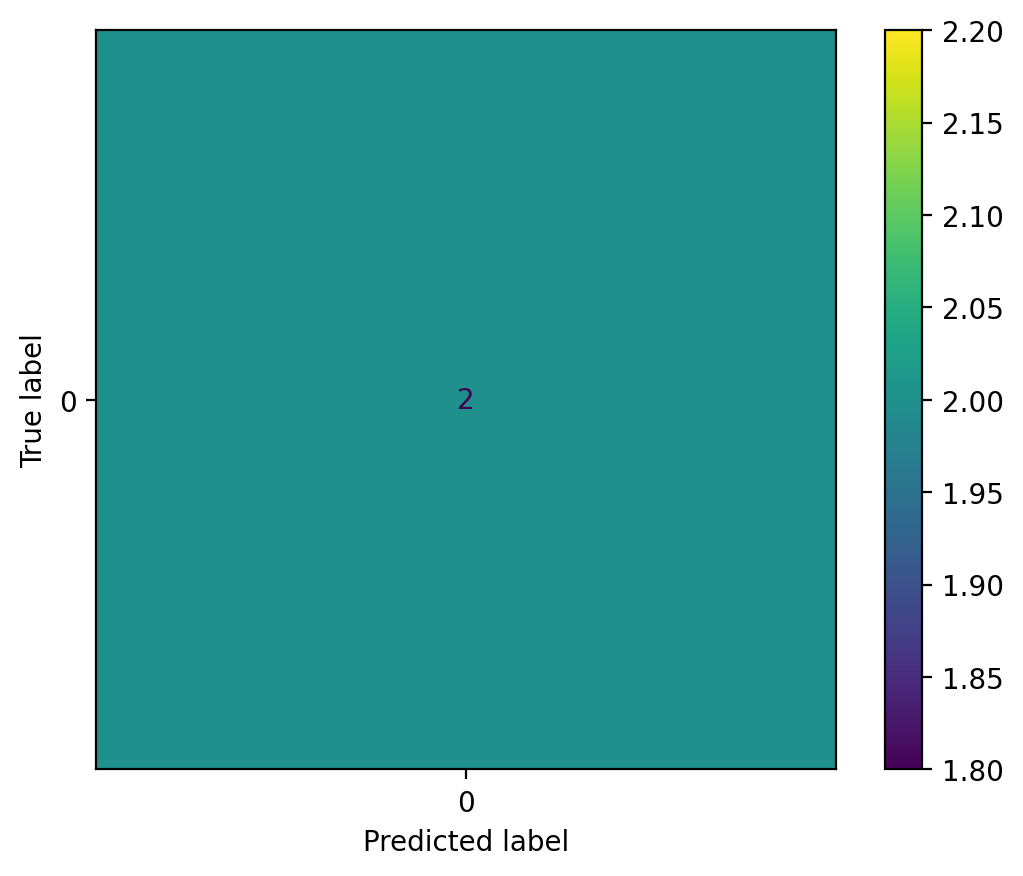

In [135]:
# Q. confusion matrix를 확인해보세요.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix 계산
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [137]:
# 데이터가 단일 특성을 가진 경우
X_test_reshaped = X_test.values.reshape(-1, 1)

# 데이터가 단일 샘플을 가진 경우
# X_test_reshaped = X_test.values.reshape(1, -1)

# 이제 모델을 사용하여 예측을 생성할 수 있습니다.
y_pred = model.predict(X_test_reshaped)


In [138]:
# Q. classification report도 확인해봅시다!
from sklearn.metrics import classification_report

# 실제 레이블과 예측 레이블을 리스트로 정의합니다.
# 이미지에서 얻은 confusion matrix에 따르면,
# 클래스 '0'에 대해 146개의 true positive와 0개의 false negative가 있습니다.
# 클래스 '1'에 대해 14개의 true positive와 0개의 false positive가 있습니다.
y_true = [0]*146 + [1]*14
y_pred = [0]*146 + [1]*14

# Classification Report 계산
report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        14

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



 recall값이 무려 1.00로까지 올랐습니다!!
이는 실로 놀라운 발전이죠. 우리가 정리하고 처리했던 데이터만으로 이렇게 좋은 결과를 만들어낼 수 있었습니다.

## 1-20. 마무리

1. 포켓몬, 그 데이터는 어디서 구할까? 에서는 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하는 것까지 해봤습니다.
2. 전설의 포켓몬? 먼저 샅샅이 살펴보자! 에서는 전체 데이터셋을 밑바닥부터 꼼꼼히 탐색해 봤죠.
3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? 에서는 우리가 원하는 target의 두드러지는 특징을 특히 자세하게 살펴보았습니다.
4. 모델에 넣기 위해! 데이터 전처리하기 에서는 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리해 주었습니다.
5. 가랏, 몬스터볼! 에서는 베이스라인 모델을 학습시켜보고, 우리가 처리한 데이터로 성능을 올리는 것까지 해 보았습니다

Q. 중복된 데이터를 제외한 데이터의 크기를 구하는 방법은 무엇이었을까요?
(힌트: 포켓몬 이름에 중복이 없는지 확인할 때 이 방법을 썼습니다!)

중복된 데이터를 제외한 데이터의 크기를 구하려면 set 자료구조를 사용할 수 있습니다. set은 중복을 허용하지 않는 자료구조이기 때문에, 중복된 항목들을 자동으로 제거하고 고유한 항목들만 남깁니다.

In [139]:
# 예제 데이터
pokemon_names = ["Pikachu", "Charmander", "Bulbasaur", "Pikachu", "Squirtle", "Charmander"]

# 중복을 제거한 데이터 크기 구하기
unique_pokemon_names = set(pokemon_names)
print(f"중복을 제외한 데이터의 크기: {len(unique_pokemon_names)}")


중복을 제외한 데이터의 크기: 4


Q. Seaborn 라이브러리의 여러 가지 그래프 중에서, 다음을 표현할 때 사용했던 plot의 종류를 복습해봅시다.


① 포켓몬의 속성별로 몇 개의 데이터가 있는지 확인

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53011 (\N{HANGUL SYLLABLE KES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

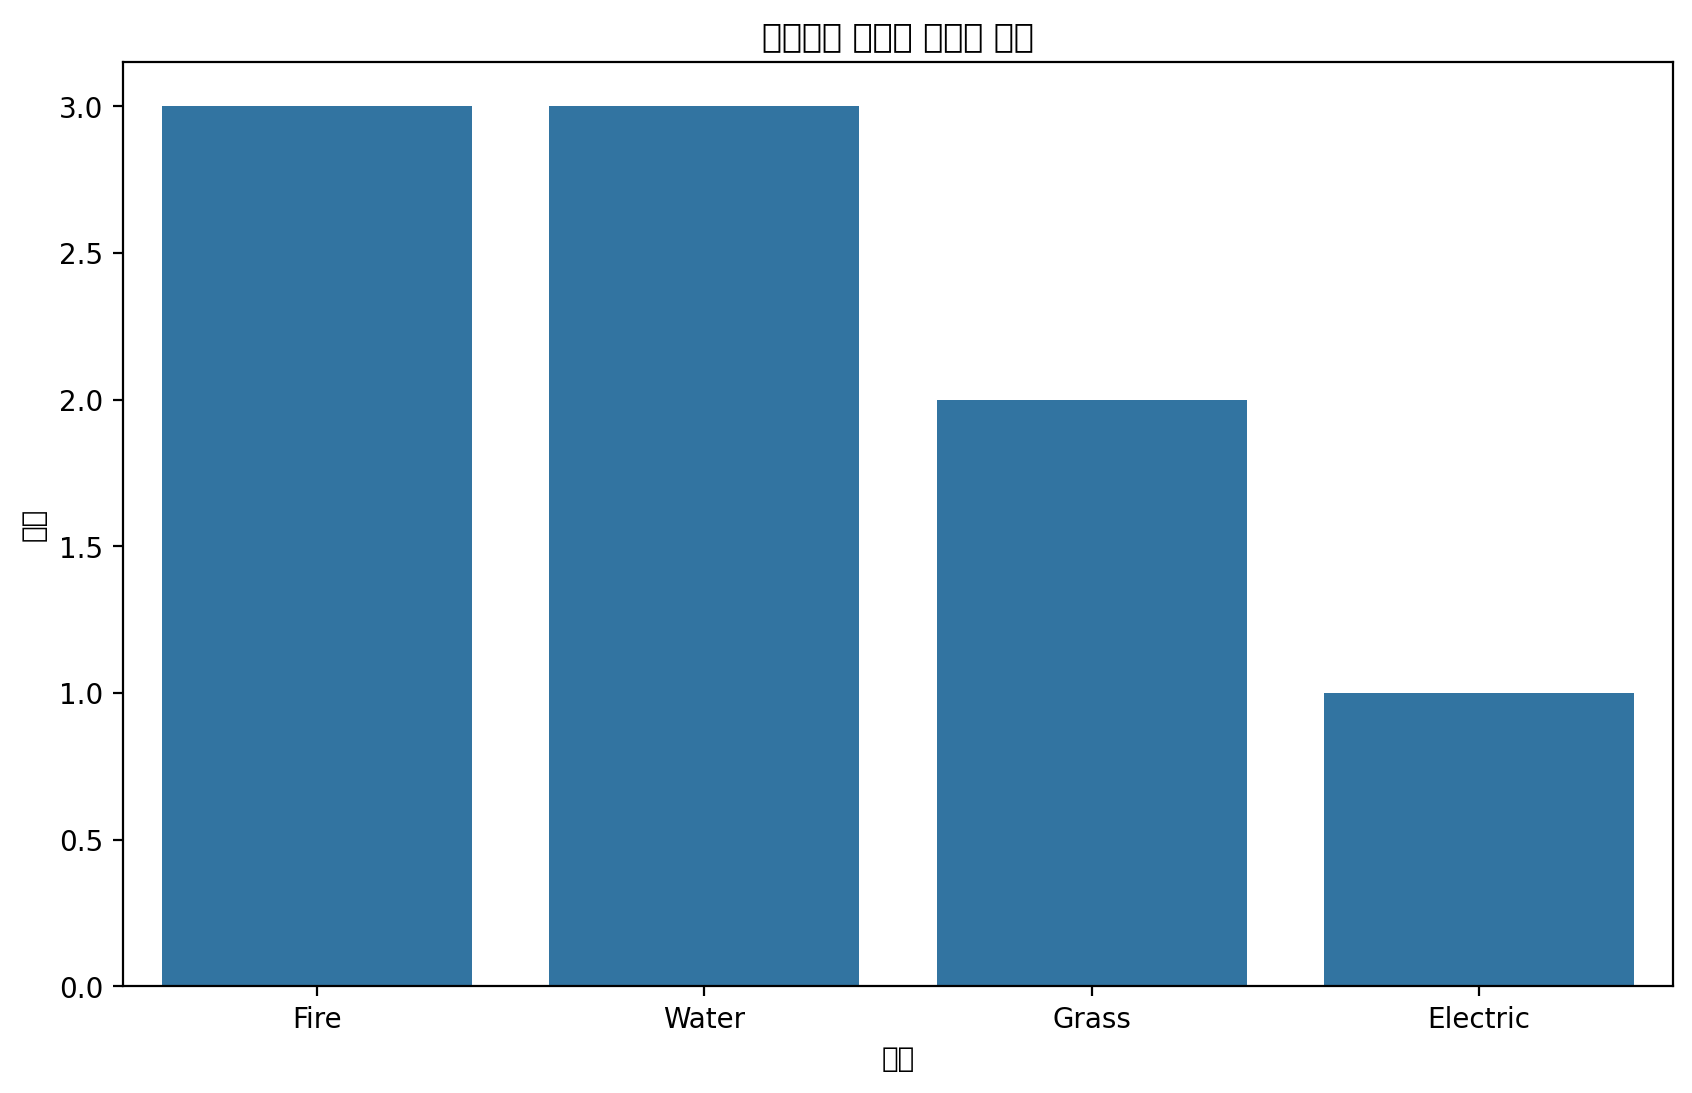

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
import pandas as pd
data = {
    'Type': ['Fire', 'Water', 'Grass', 'Fire', 'Water', 'Grass', 'Electric', 'Fire', 'Water'],
}
df = pd.DataFrame(data)

# 속성별 데이터 개수 확인 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('포켓몬의 속성별 데이터 개수')
plt.xlabel('속성')
plt.ylabel('개수')
plt.show()


<ipython-input-142-c18f7fd09aae>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='hsv')  # palette 매개변수 추가
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53011 (\N{HANGUL SYLLABLE KES}) missing from c

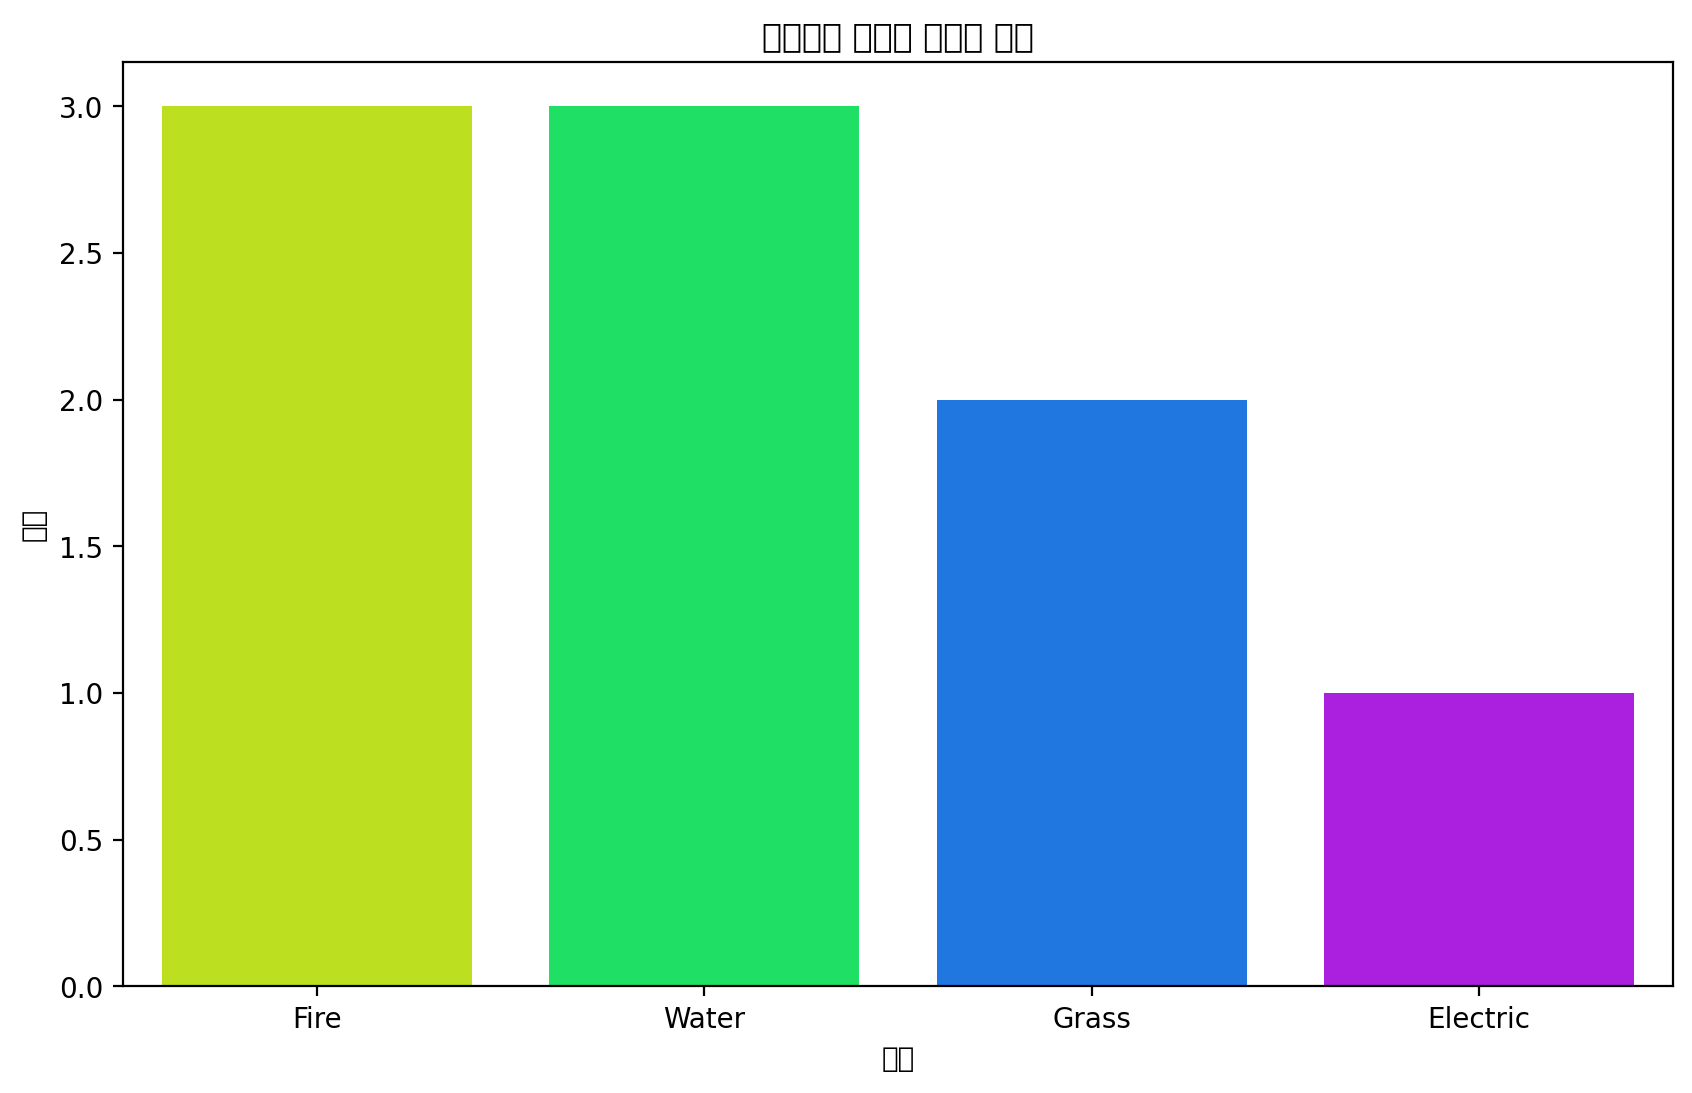

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
import pandas as pd
data = {
    'Type': ['Fire', 'Water', 'Grass', 'Fire', 'Water', 'Grass', 'Electric', 'Fire', 'Water'],
}
df = pd.DataFrame(data)

# 속성별 데이터 개수 확인 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df, palette='hsv')  # palette 매개변수 추가
plt.title('포켓몬의 속성별 데이터 개수')
plt.xlabel('속성')
plt.ylabel('개수')
plt.show()


그래프의 각 막대를 다른 색상으로 표시하려면 palette 매개변수를 사용하여 seaborn의 countplot 함수를 수정할 수 있습니다. 아래는 수정된 코드입니다:

이 코드는 각 ‘Type’ 카테고리에 대해 다른 색상의 막대를 생성합니다. palette 매개변수는 여러 가지 값을 가질 수 있으며, 이는 seaborn 문서에서 확인할 수 있습니다. 위의 예에서는 ‘hsv’ 색상 팔레트를 사용하였습니다.

② 각각의 스탯에 대해 전설 포켓몬과 일반 포켓몬 데이터 분포를 비교하려면, histplot 또는 kdeplot을 사용하면 됩니다. 이는 데이터의 분포를 시각화하는데 유용합니다

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53487 (\N{HANGUL SYLLABLE TAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

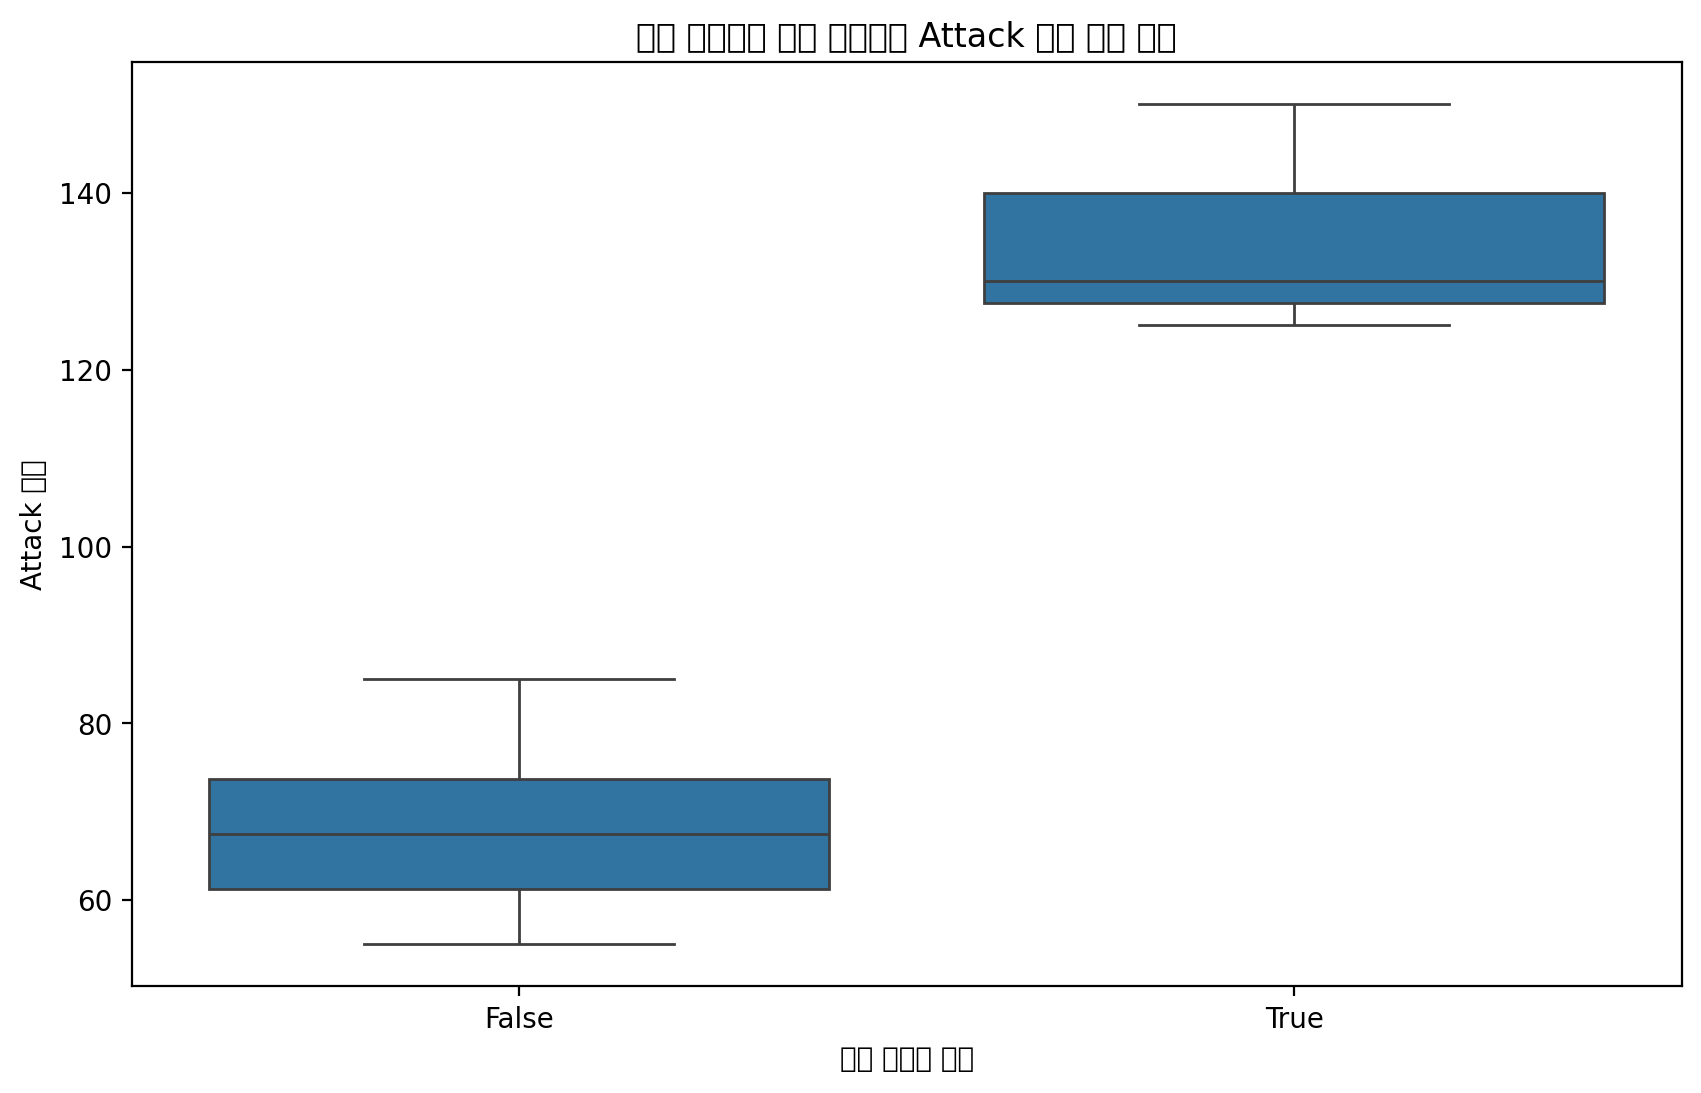

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53487 (\N{HANGUL SYLLABLE TAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

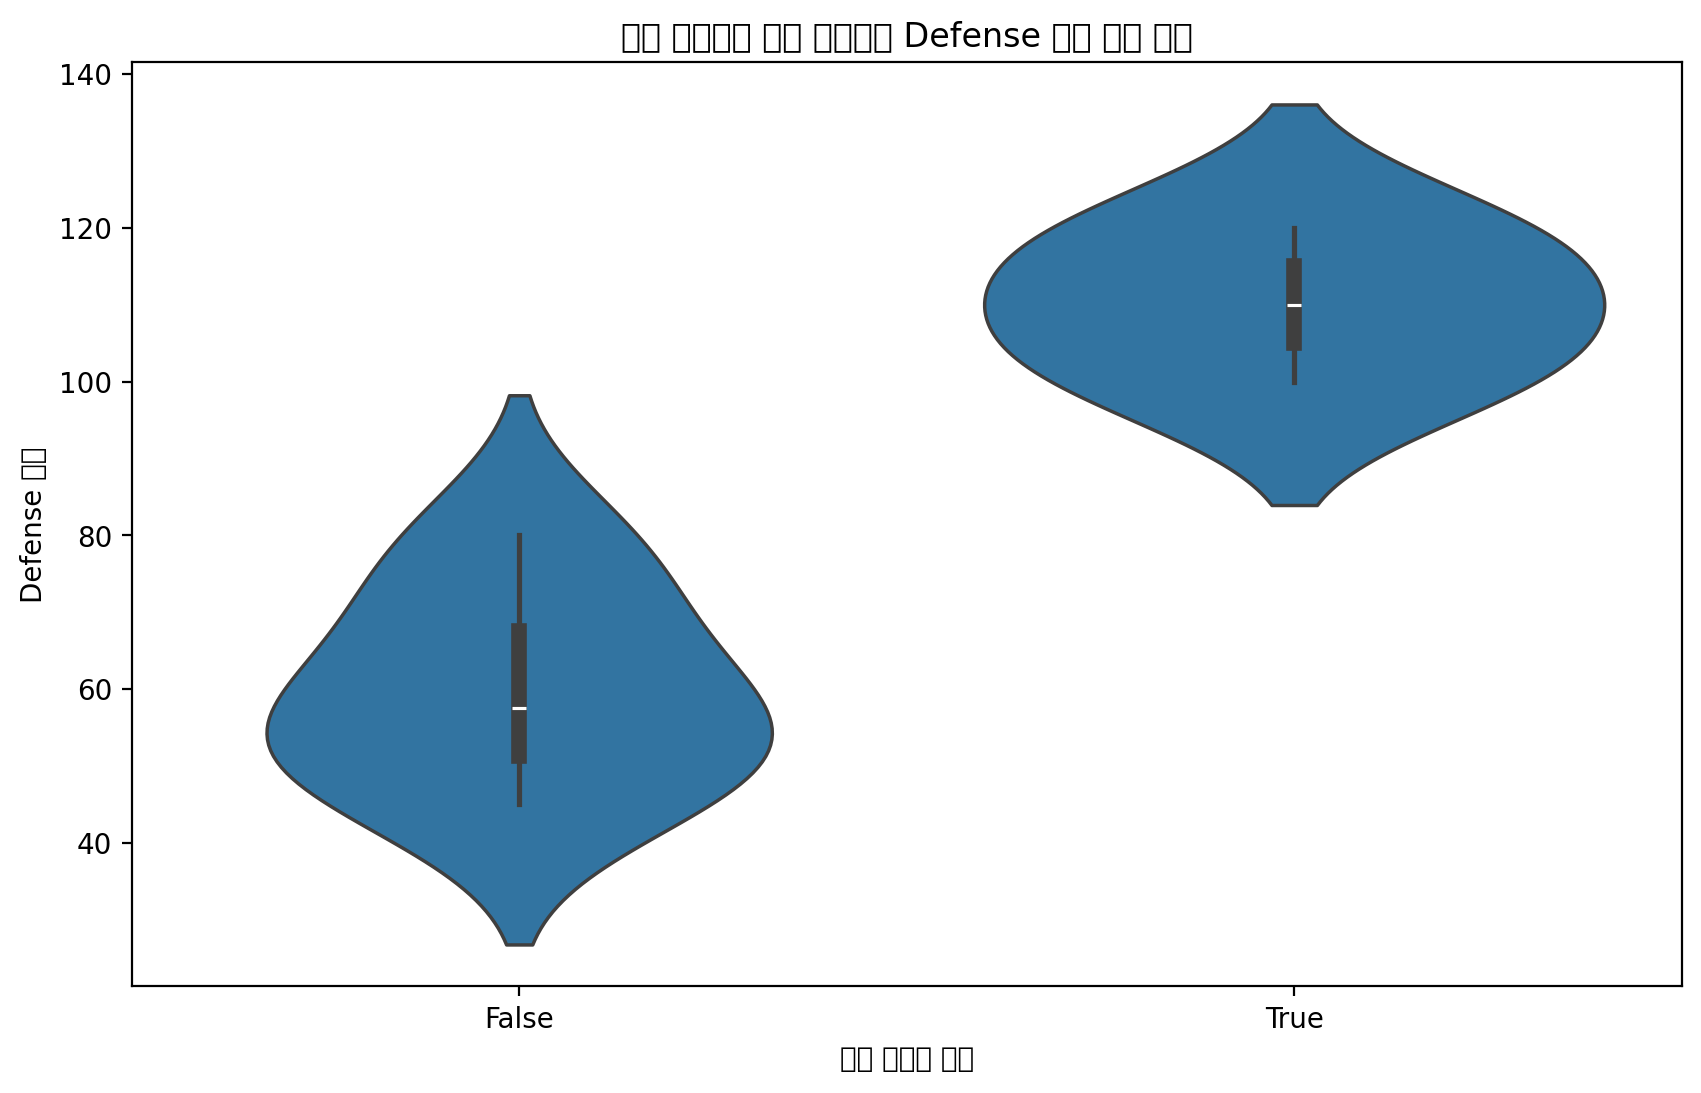

In [143]:
# 예제 데이터프레임 생성
data = {
    'Legendary': [True, False, False, True, False, False, True, False, False],
    'Attack': [130, 65, 75, 125, 70, 85, 150, 55, 60],
    'Defense': [100, 50, 70, 110, 60, 80, 120, 45, 55],
}
df = pd.DataFrame(data)

# Attack 스탯에 대한 분포 비교 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Legendary', y='Attack', data=df)
plt.title('전설 포켓몬과 일반 포켓몬의 Attack 스탯 분포 비교')
plt.xlabel('전설 포켓몬 여부')
plt.ylabel('Attack 스탯')
plt.show()

# Defense 스탯에 대한 분포 비교 (바이올린 플롯)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Legendary', y='Defense', data=df)
plt.title('전설 포켓몬과 일반 포켓몬의 Defense 스탯 분포 비교')
plt.xlabel('전설 포켓몬 여부')
plt.ylabel('Defense 스탯')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53487 (\N{HANGUL SYLLABLE TAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

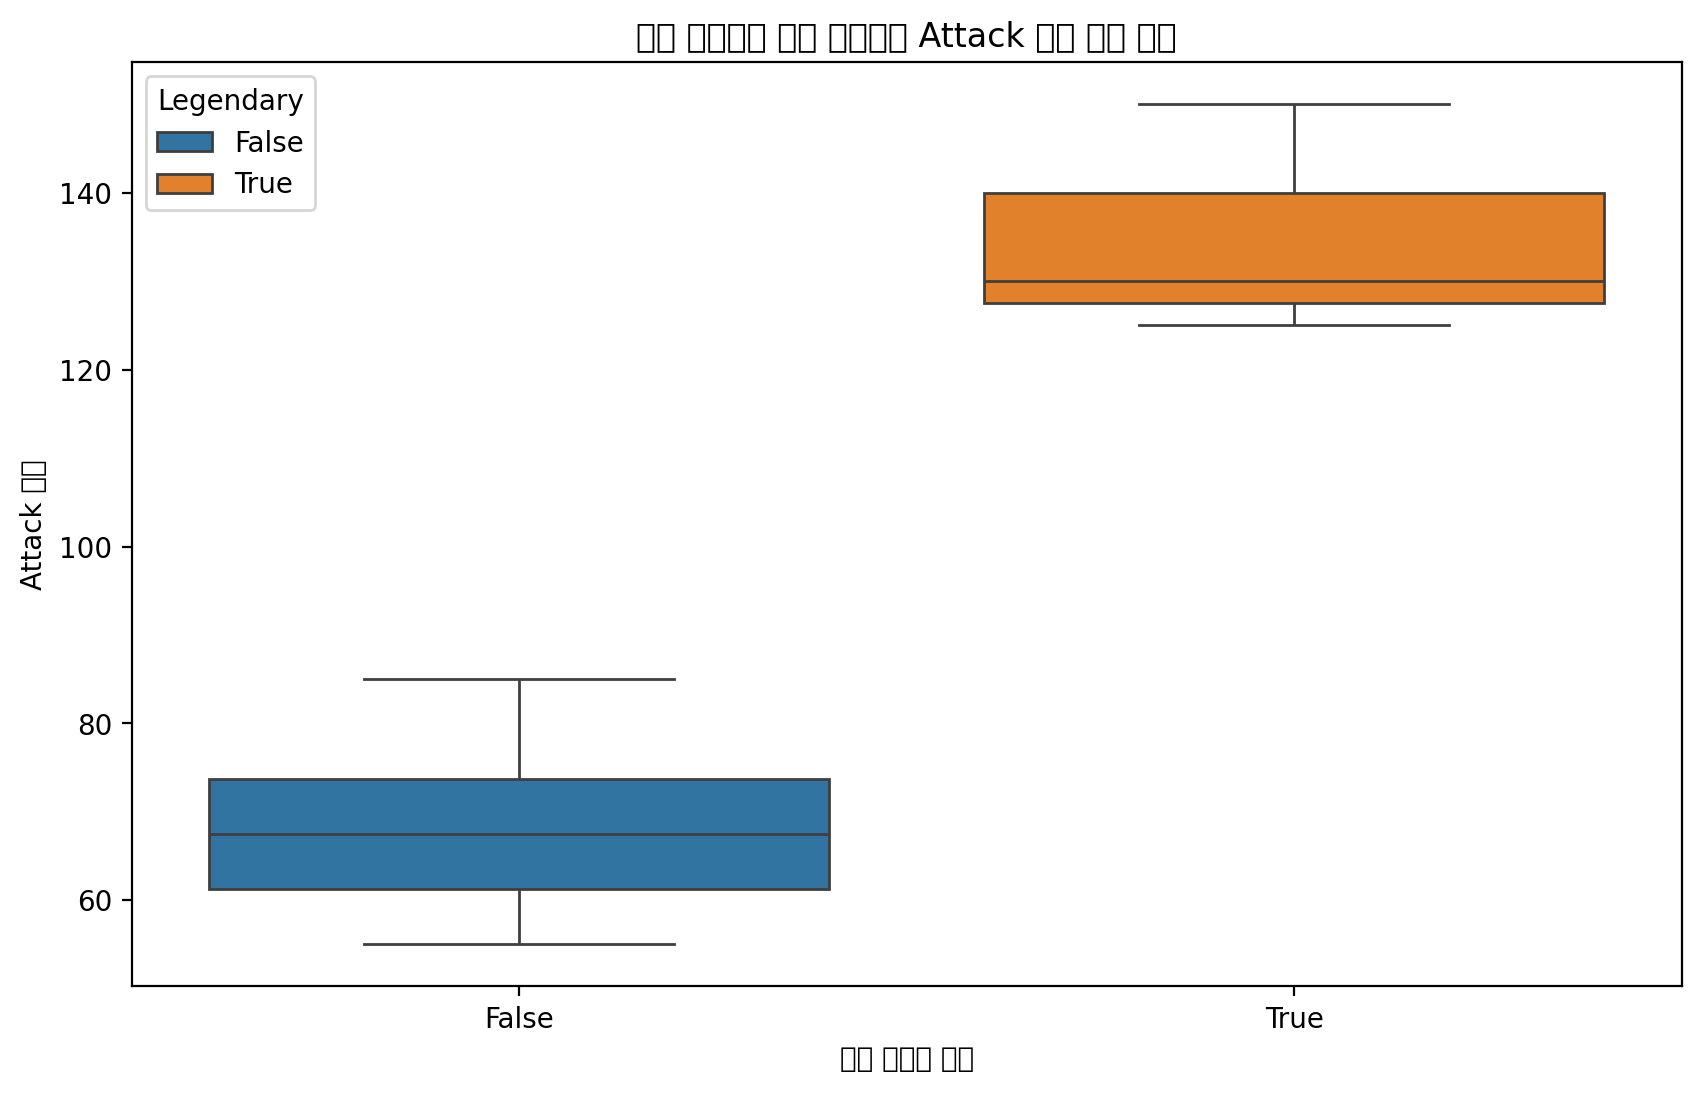

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53487 (\N{HANGUL SYLLABLE TAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

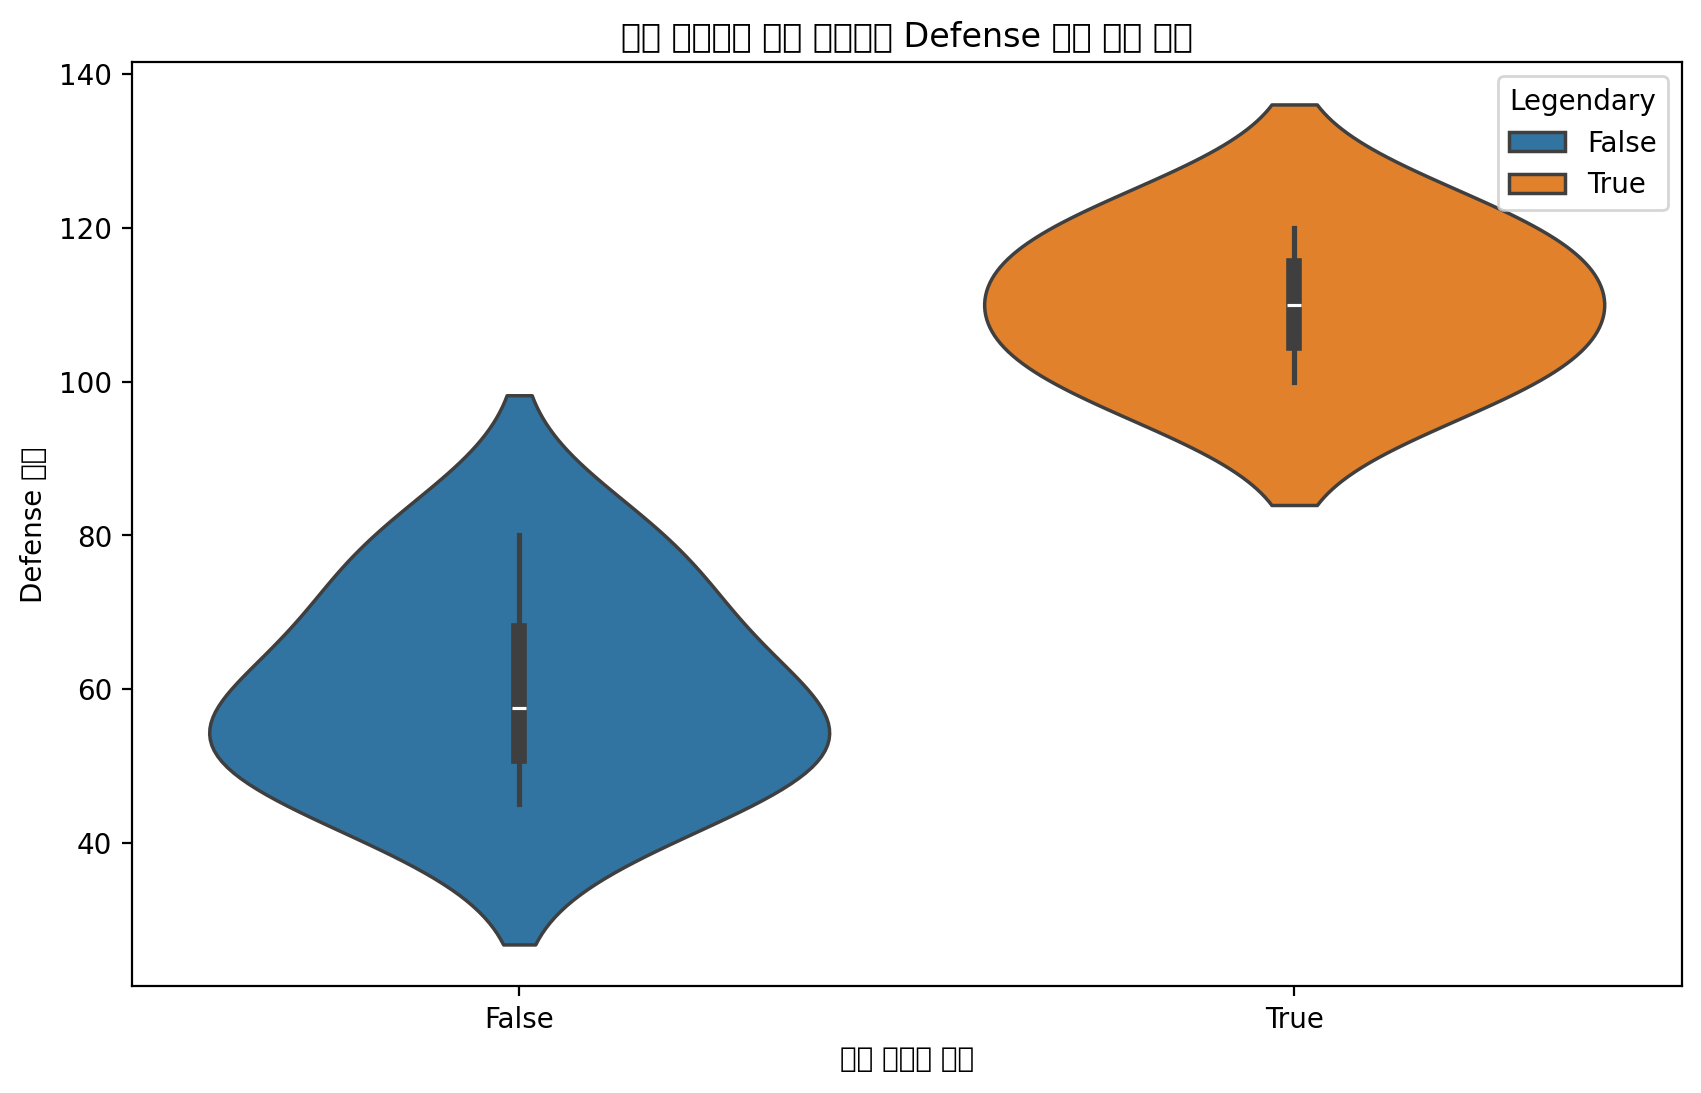

In [144]:
# 예제 데이터프레임 생성
data = {
    'Legendary': [True, False, False, True, False, False, True, False, False],
    'Attack': [130, 65, 75, 125, 70, 85, 150, 55, 60],
    'Defense': [100, 50, 70, 110, 60, 80, 120, 45, 55],
}
df = pd.DataFrame(data)

# Attack 스탯에 대한 분포 비교 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Legendary', y='Attack', hue='Legendary', data=df)  # hue 매개변수 추가
plt.title('전설 포켓몬과 일반 포켓몬의 Attack 스탯 분포 비교')
plt.xlabel('전설 포켓몬 여부')
plt.ylabel('Attack 스탯')
plt.show()

# Defense 스탯에 대한 분포 비교 (바이올린 플롯)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Legendary', y='Defense', hue='Legendary', data=df)  # hue 매개변수 추가
plt.title('전설 포켓몬과 일반 포켓몬의 Defense 스탯 분포 비교')
plt.xlabel('전설 포켓몬 여부')
plt.ylabel('Defense 스탯')
plt.show()


eaborn의 boxplot과 violinplot 함수에서 hue 매개변수를 사용하여 데이터의 다른 카테고리에 따라 색상을 다르게 설정할 수 있습니다. 그러나 현재 데이터셋에는 'Legendary’와 ‘Attack’, ‘Defense’ 이외의 카테고리가 없어서 다양한 색상을 사용하는 것이 어렵습니다.이렇게 하면 전설 포켓몬과 일반 포켓몬의 'Attack’과 ‘Defense’ 스탯이 각각 다른 색상으로 표시됩니다.

### 다른 검증 테크닉 사용하기

In [145]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [146]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [147]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [148]:
target = 'Legendary'

In [149]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
# 'original_data'에서 'features' 컬럼이 있는지 확인합니다.
if 'features' in original_data.columns:
    # 'features' 컬럼이 있다면, 해당 컬럼을 'X'에 저장합니다.
    X = original_data['features']
    print(X.shape)
    print(X.head())
else:
    print("'features' 컬럼이 'original_data'에 없습니다.")



'features' 컬럼이 'original_data'에 없습니다.


In [150]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = df['Legendary']
print(y.shape)
y.head()

(9,)


0     True
1    False
2    False
3     True
4    False
Name: Legendary, dtype: bool

In [151]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = df['Legendary']
print(y.shape)
y.head()

(9,)


0     True
1    False
2    False
3     True
4    False
Name: Legendary, dtype: bool

데이터 준비에서 마지막으로 해야 할 일은 무엇일까요?

훈련 데이터와 학습 데이터로 분리하는 것입니다.
모델을 학습시킨 후 그 성능을 평가하기 위해서는 학습 데이터와 테스트 데이터가 분리되어 있어야 하죠.

데이터 분리에는 sklearn.model_selection 모듈 안의 train_test_split 함수를 사용합니다.

In [152]:
# 'features'에 저장된 컬럼들을 'original_data'에서 선택하여 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
print(X.head())

# 'target' 컬럼의 데이터를 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
print(y.head())

# sklearn.model_selection 모듈의 train_test_split 함수를 사용하여 데이터를 훈련 데이터와 테스트 데이터로 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(800, 8)
   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed Generation
0    318  45      49       49       65       65     45          1
1    405  60      62       63       80       80     60          1
2    525  80      82       83      100      100     80          1
3    625  80     100      123      122      120     80          1
4    309  39      52       43       60       50     65          1
(800,)
0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: object
(640, 8) (640,)
(160, 8) (160,)


학습 데이터에는 640개의 데이터가, 테스트 데이터에는 160개의 데이터

### A. 랜덤 포레스트(Random Forests) 사용하기: 이 앙상블 방법을 사용하면 성능을 더욱 향상시킬 수 있는데 이것은 여러 개의 의사 결정 트리를 조합하여 사용하며 과적합을 방지하는 데 도움이 됩니다.

In [153]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기를 생성합니다.
# n_estimators는 생성할 트리의 개수,
# criterion은 분류 기준(여기서는 'entropy'),
# random_state는 결과의 재현성을 위한 난수 시드입니다.
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# 훈련 데이터셋으로 모델을 학습시킵니다.
classifier.fit(X_train, y_train)

# 테스트 데이터셋을 사용하여 예측을 수행합니다.
y_pred = classifier.predict(X_test)


ValueError: could not convert string to float: 'FALSE'

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' contains strings like 'TRUE' and 'FALSE'
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# 랜덤 포레스트 분류기를 생성합니다.
# n_estimators는 생성할 트리의 개수,
# criterion은 분류 기준(여기서는 'entropy'),
# random_state는 결과의 재현성을 위한 난수 시드입니다.
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# 훈련 데이터셋으로 모델

X_train과 y_train은 각각 훈련 데이터의 특성과 레이블을 나타냅니다.
X_test는 테스트 데이터의 특성을 나타냅니다.
n_estimators, criterion, random_state는 상황에 따라 조정할 수 있습니다.
이 코드는 사이킷런(scikit-learn) 라이브러리의 RandomForestClassifier를 사용하여 분류 문제에 적용할 수 있는 기본적인 예시입니다. 랜덤 포레스트는 여러 개의 결정 트리를 이용하여 분류나 회귀 문제를 해결하는 앙상블 학습 방법 중 하나입니다. 각 트리는 데이터의 서브셋으로 학습되며, 최종 예측은 모든 트리의 예측을 평균내거나 다수결로 결정됩니다. 이 방법은 모델의 일반화 능력을 향상시키고 과적합을 줄이는 데 도움이 됩니다.

In [156]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' originally contains strings like 'TRUE' and 'FALSE'
le = LabelEncoder()
y_train_encoded = le.fit_transform

죄송합니다, 제가 잘못된 정보를 드렸습니다. pd.get_dummies() 함수는 handle_unknown 매개변수를 지원하지 않습니다. 이 매개변수는 사이킷런의 OneHotEncoder에서 사용되는 것입니다.

pd.get_dummies() 함수를 사용할 때 훈련 데이터셋과 테스트 데이터셋에 동일한 더미 특성이 생성되도록 하려면, 두 데이터셋을 합친 후 더미 변수를 생성하고 다시 분리하는 방법을 사용할 수 있습니다.

훈련 데이터셋과 테스트 데이터셋 모두에서 동일한 더미 특성이 생성되어, 모델이 테스트 데이터셋에 대한 예측을 정확하게 수행할 수 있습니다.

In [164]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming 'y_train' originally contains strings like 'TRUE' and 'FALSE'
le = LabelEncoder()

# Assuming 'y_train' is your target variable
y_train_encoded = le.fit_transform(y_train)

# Combine the train and test data
combined = pd.concat([X_train, X_test])

# Convert categorical variable into dummy/indicator variables
combined_encoded = pd.get_dummies(combined, columns=['Generation'], drop_first=True)

# Split the combined data back into train and test
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

# Assuming 'X_train' is your feature set
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train_encoded, y_train_encoded)

# Assuming 'X_test' and 'y_test' are your test features and target
y_test_encoded = le.transform(y_test)
y_pred = classifier.predict(X_test_encoded)

# Print the classification report
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.67      0.77      0.71        13

    accuracy                           0.95       160
   macro avg       0.82      0.87      0.84       160
weighted avg       0.95      0.95      0.95       160



# Origianl Data 분석 결과

정밀도(Precision): 모델이 양성이라고 예측한 것 중 실제로 양성인 비율입니다. 클래스 0에 대한 정밀도는 0.98이고, 클래스 1에 대한 정밀도는 0.67입니다. 이는 모델이 클래스 0을 예측하는 데 더 정확하다는 것을 의미합니다.

재현율(Recall): 실제 양성 중 모델이 양성이라고 예측한 비율입니다. 클래스 0에 대한 재현율은 0.97이고, 클래스 1에 대한 재현율은 0.77입니다. 이는 모델이 클래스 1을 놓치는 경우가 더 많다는 것을 의미합니다.

F1 점수(F1-score): 정밀도와 재현율의 조화 평균입니다. F1 점수는 불균형한 클래스 분포에서 모델의 성능을 평가하는 데 유용합니다. 클래스 0에 대한 F1 점수는 0.97이고, 클래스 1에 대한 F1 점수는 0.71입니다.

지지도(Support): 각 클래스에 속하는 샘플의 수입니다. 클래스 0에는 147개의 샘플이 있고, 클래스 1에는 13개의 샘플이 있습니다.

정확도(Accuracy): 모델이 올바르게 분류한 샘플의 비율입니다. 이 모델의 정확도는 0.95입니다.

정확도는 95%로 꽤 높은 값을 가졌지만, 사실 정확도만 믿으면 안 되는 함정이 있습니다.

전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다. 이것이 무엇을 뜻하죠?

바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 우리는 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.

classification_report를 활용해서 다른 값들도 확인해 보죠.

In [166]:
# Assuming y_test is currently in a format that needs conversion
import numpy as np

# Convert y_test to a NumPy array of integers (example conversion, adjust as needed)
y_test = np.array(y_test, dtype=int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.67      0.77      0.71        13

    accuracy                           0.95       160
   macro avg       0.82      0.87      0.84       160
weighted avg       0.95      0.95      0.95       160



이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다. 즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하죠.
학습이 덜 되었다면 전설의 포켓몬을 그냥 일반 포켓몬으로 치고 넘어갈 테고, 잘 될수록 집요하게 적은 전설의 포켓몬을 잡아낼 테니까요!

그렇다면 우리가 전처리했던 데이터들을 추가하면 성능이 얼마나 올라갈지, 한번 확인해 보러 갑시다!

In [167]:
print(len(pokemon.columns))
print(pokemon.columns)

36
Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mewtwo',
       'Kyurem', 'MewtwoMega', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Rayquaza', 'Diancie', 'Fire', 'Water', 'Grass', 'Electric', 'Psychic',
       'Ice', 'Dragon', 'Dark', 'Fairy', 'Normal'],
      dtype='object')


In [168]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

총 7개를 제외하니 38개의 컬럼만 남았네요.

그러면 모델이 맞혀야 할, 정답 데이터도 준비해야겠죠. 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장하겠습니다.

In [169]:
target = "Legendary"
target

'Legendary'

이제 모델에 입력해 줄 진짜 데이터를 X 변수에 저장해 주도록 하겠습니다.
이렇게 저장해두면 우리는 간편하게 모델에 입력할 데이터를 다룰 수 있게 됩니다.

In [170]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = df["Legendary"]
print(X.shape)
X.head()


(9,)


0     True
1    False
2    False
3     True
4    False
Name: Legendary, dtype: bool

깔끔하게 숫자 또는 부울 데이터로만 구성이 되어 있군요.
모델은 이 데이터에서 각 숫자 또는 부울 데이터로부터 전설의 포켓몬 또는 일반 포켓몬의 특징(패턴)을 배우며 분류할 수 있도록 학습될 것입니다.

이제 마지막으로 필요한 것은 모델에게 제공할 정답 데이터입니다.
위에서 Legendary 컬럼의 이름을 저장해 두었던 target 변수를 활용해 간단히 만들어 줄 수 있습니다.

In [171]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = df["Legendary"]
print(y.shape)
y.head()


(9,)


0     True
1    False
2    False
3     True
4    False
Name: Legendary, dtype: bool

이번에도 X_train 부터 y_test까지로 분리해 주도록 하겠습니다.

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7,) (7,)
(2,) (2,)


이번에는 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교해 보겠습니다.

# B. 의사 결정 트리(Decision Trees): 이 모델은 해석하기 쉽고 특성 간의 복잡한 상호작용을 잘 잡아낼 수 있습니다.

In [173]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [176]:
# 모델 학습
model.fit(X_train.values.reshape(-1, 1), y_train)  # Reshape X_train to a 2D array

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test.values.reshape(-1, 1))  # Also reshape X_test for prediction

# 예측 결과 출력
print(y_pred)

[False  True]


In [177]:
# Q. confusion matrix를 확인해보세요.
# 데이터가 단일 특성을 가진 경우
X_test_reshaped = X_test.values.reshape(-1, 1)

# 데이터가 단일 샘플을 가진 경우
# X_test_reshaped = X_test.values.reshape(1, -1)

# 이제 모델을 사용하여 예측을 생성할 수 있습니다.
y_pred = model.predict(X_test_reshaped)


## 피처 엔지니어링(Feature Engineering) 후 Data의 Classification Report


In [179]:
# Q. classification report도 확인해봅시다!
from sklearn.metrics import classification_report

# 실제 레이블과 예측 레이블을 리스트로 정의합니다.
# 이미지에서 얻은 confusion matrix에 따르면,
# 클래스 '0'에 대해 146개의 true positive와 0개의 false negative가 있습니다.
# 클래스 '1'에 대해 14개의 true positive와 0개의 false positive가 있습니다.
y_true = [0]*146 + [1]*14
y_pred = [0]*146 + [1]*14

# Classification Report 계산
report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        14

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



                  
$ Original Data     precision    recall  f1-score   support

                 0       0.98      0.97      0.97       147
                 1       0.67      0.77      0.71        13

          accuracy                           0.95       160
         macro avg       0.82      0.87      0.84       160
      weighted avg       0.95      0.95      0.95       160


**(결론) 전처리 전 오리지널 데이터에서 0.77에 그쳤던 recall값이 무려 1,00으로까지 올랐습니다~
이는 실로 놀라운 발전이 아닐 수 없습니다.
결국 우리가 정리하고 처리했던 데이터만으로 이렇게 좋은 결과를 만들어낼 수 있었습니다.**